# **Latar Belakang**  
Dalam industri ritel, pemahaman terhadap perilaku pelanggan sangat penting untuk meningkatkan profit dan efektivitas strategi pemasaran. Supermarket memiliki berbagai jenis pelanggan dengan karakteristik yang berbeda, mulai dari tingkat pendapatan, status pernikahan, hingga kebiasaan belanja.  

Dataset **Supermarket Customers** mencakup berbagai informasi, seperti:  
1. **Karakteristik Demografi Pelanggan** → Pendidikan, status pernikahan, jumlah anak/remaja dalam rumah tangga, dan tingkat pendapatan pelanggan.  
2. **Kebiasaan Belanja** → Total pengeluaran pelanggan untuk berbagai kategori produk (*wine, daging, ikan, buah, dll.*).  
3. **Respon terhadap Promosi** → Partisipasi pelanggan dalam berbagai kampanye pemasaran.  
4. **Metode Pembelian** → Jumlah pembelian melalui website, katalog, dan toko fisik.  

Analisis terhadap data ini akan membantu perusahaan dalam memahami pola belanja pelanggan serta menyesuaikan strategi pemasaran agar lebih tepat sasaran.  

# **Pernyataan Masalah**  
Perusahaan ingin memahami perilaku pembelian pelanggan berdasarkan jenis produk,tempat pembelian, dan efektivitas promosi dengan melihat hubungan karakteristik demografis (status pernikahan, jumlah anak/remaja, pendapatan) terhadap pola belanja. Tujuannya adalah untuk memaksimalkan profit dan meningkatkan efektivitas strategi pemasaran.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:

**1️. Bagaimana pola pembelian produk berdasarkan karakteristik pelanggan?**  
- Apakah pelanggan dengan status pernikahan tertentu cenderung membeli jenis produk tertentu?
- Bagaimana kategori pendapatan memengaruhi pembelian terhadap berbagai jenis produk?
- Apakah jumlah anak dan remaja dalam keluarga berkorelasi dengan pilihan produk?
- Produk apa saja yang paling banyak dibeli oleh pelanggan berdasarkan segmentasi LRFM?

**2️. Bagaimana karakteristik tempat pembelian memengaruhi keputusan pelanggan?**  
- Apakah pelanggan lebih banyak melakukan pembelian secara online, katalog, atau toko fisik?
- Bagaimana status pernikahan dan pendapatan memengaruhi preferensi tempat pembelian?

**3️. Seberapa efektif strategi promosi yang telah dijalankan?**   
- Apakah pelanggan yang sering menerima kampanye mempengaruhi total pembeliannya?   
- Promosi mana yang paling efektif dalam mengurangi risiko churn, terutama pada segmen pelanggan dengan nilai monetary atau frequency yang rendah?


# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import chi2_contingency
import pandas as pd
from scipy.stats import shapiro


# **Read Dataset**

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
!gdown 1ggsWF-flwuytVrNLoMxTOYSZ-tqlYYgK
df = pd.read_csv("Supermarket Customers.csv", sep="\t")
df

Downloading...
From: https://drive.google.com/uc?id=1ggsWF-flwuytVrNLoMxTOYSZ-tqlYYgK
To: /content/Supermarket Customers.csv
100% 220k/220k [00:00<00:00, 59.4MB/s]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Mengubah tipe data ID menjadi string dan Dt-Customer menjadi datetime**

In [8]:
df['ID'] = df['ID'].astype(str)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# **Data Cleaning**

**Cek Data Duplikat**

In [9]:
df.duplicated().sum()

np.int64(0)

**Cek Missing Value**

In [10]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [11]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


- Terdapat missing value pada kolom 'Income' sebanyak 24 nilai

In [12]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


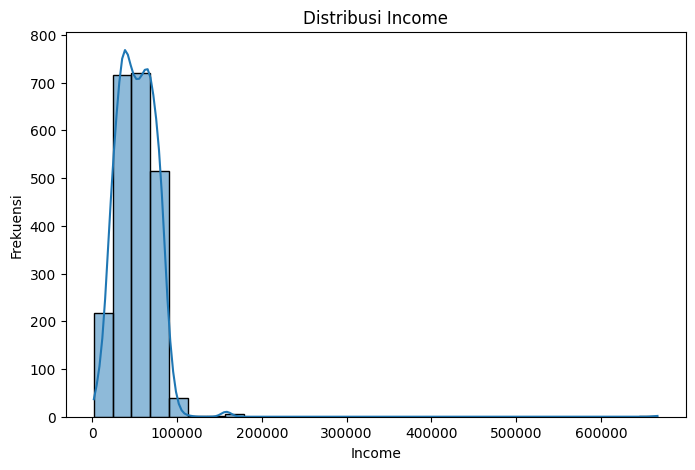

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.xlabel("Income")
plt.ylabel("Frekuensi")
plt.title("Distribusi Income")
plt.show()

- Distribusi data kolom income tidak normal

In [14]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method='pearson')

income_correlation = correlation_matrix['Income'].sort_values(ascending=False)

print(income_correlation)

Income                 1.000000
NumCatalogPurchases    0.589162
MntMeatProducts        0.584633
MntWines               0.578650
NumStorePurchases      0.529362
MntSweetProducts       0.440744
MntFishProducts        0.438871
MntFruits              0.430842
NumWebPurchases        0.387878
AcceptedCmp5           0.335943
MntGoldProds           0.325916
AcceptedCmp1           0.276820
AcceptedCmp4           0.184400
Response               0.133047
AcceptedCmp2           0.087545
Teenhome               0.019133
Recency               -0.003970
AcceptedCmp3          -0.016174
Complain              -0.027225
NumDealsPurchases     -0.083101
Year_Birth            -0.161791
Kidhome               -0.428669
NumWebVisitsMonth     -0.553088
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Income, dtype: float64


In [15]:
df['Income'] = df.groupby('NumCatalogPurchases')['Income'].transform(lambda x: x.fillna(x.median()))

kolom income berkorelasi positif terbesar dengan kolom NumCatalogPurchases, diasumsikan bahwa semakin banyak katalog yang dibeli, semakin besar pula pendapatan. sehingga pengisian missing value kolom "income" dilakukan dengan menggroup kolom 'NumCatalogPurchases', dan karena data tidak terdistribusi normal maka dilakukan pengisian dengan nilai median

**Standarisasi nama kolom, kolom Alone menjadi Single serta drop data dengan nilai YOLO dan Absurd**

In [16]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [17]:
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single'})

Nilai Alone diasumsikan sama maknanya dengan nilai Single sehingga nama data dengan nilai Alone diubah menjadi Single

In [18]:
df = df.drop(df[df['Marital_Status'].isin(['YOLO', 'Absurd'])].index)

Nilai YOLO dan Absurd dianggap tidak valid dan membingungkan dalam analisis, sehingga data dengan nilai tersebut di drop

**Cek Outlier**

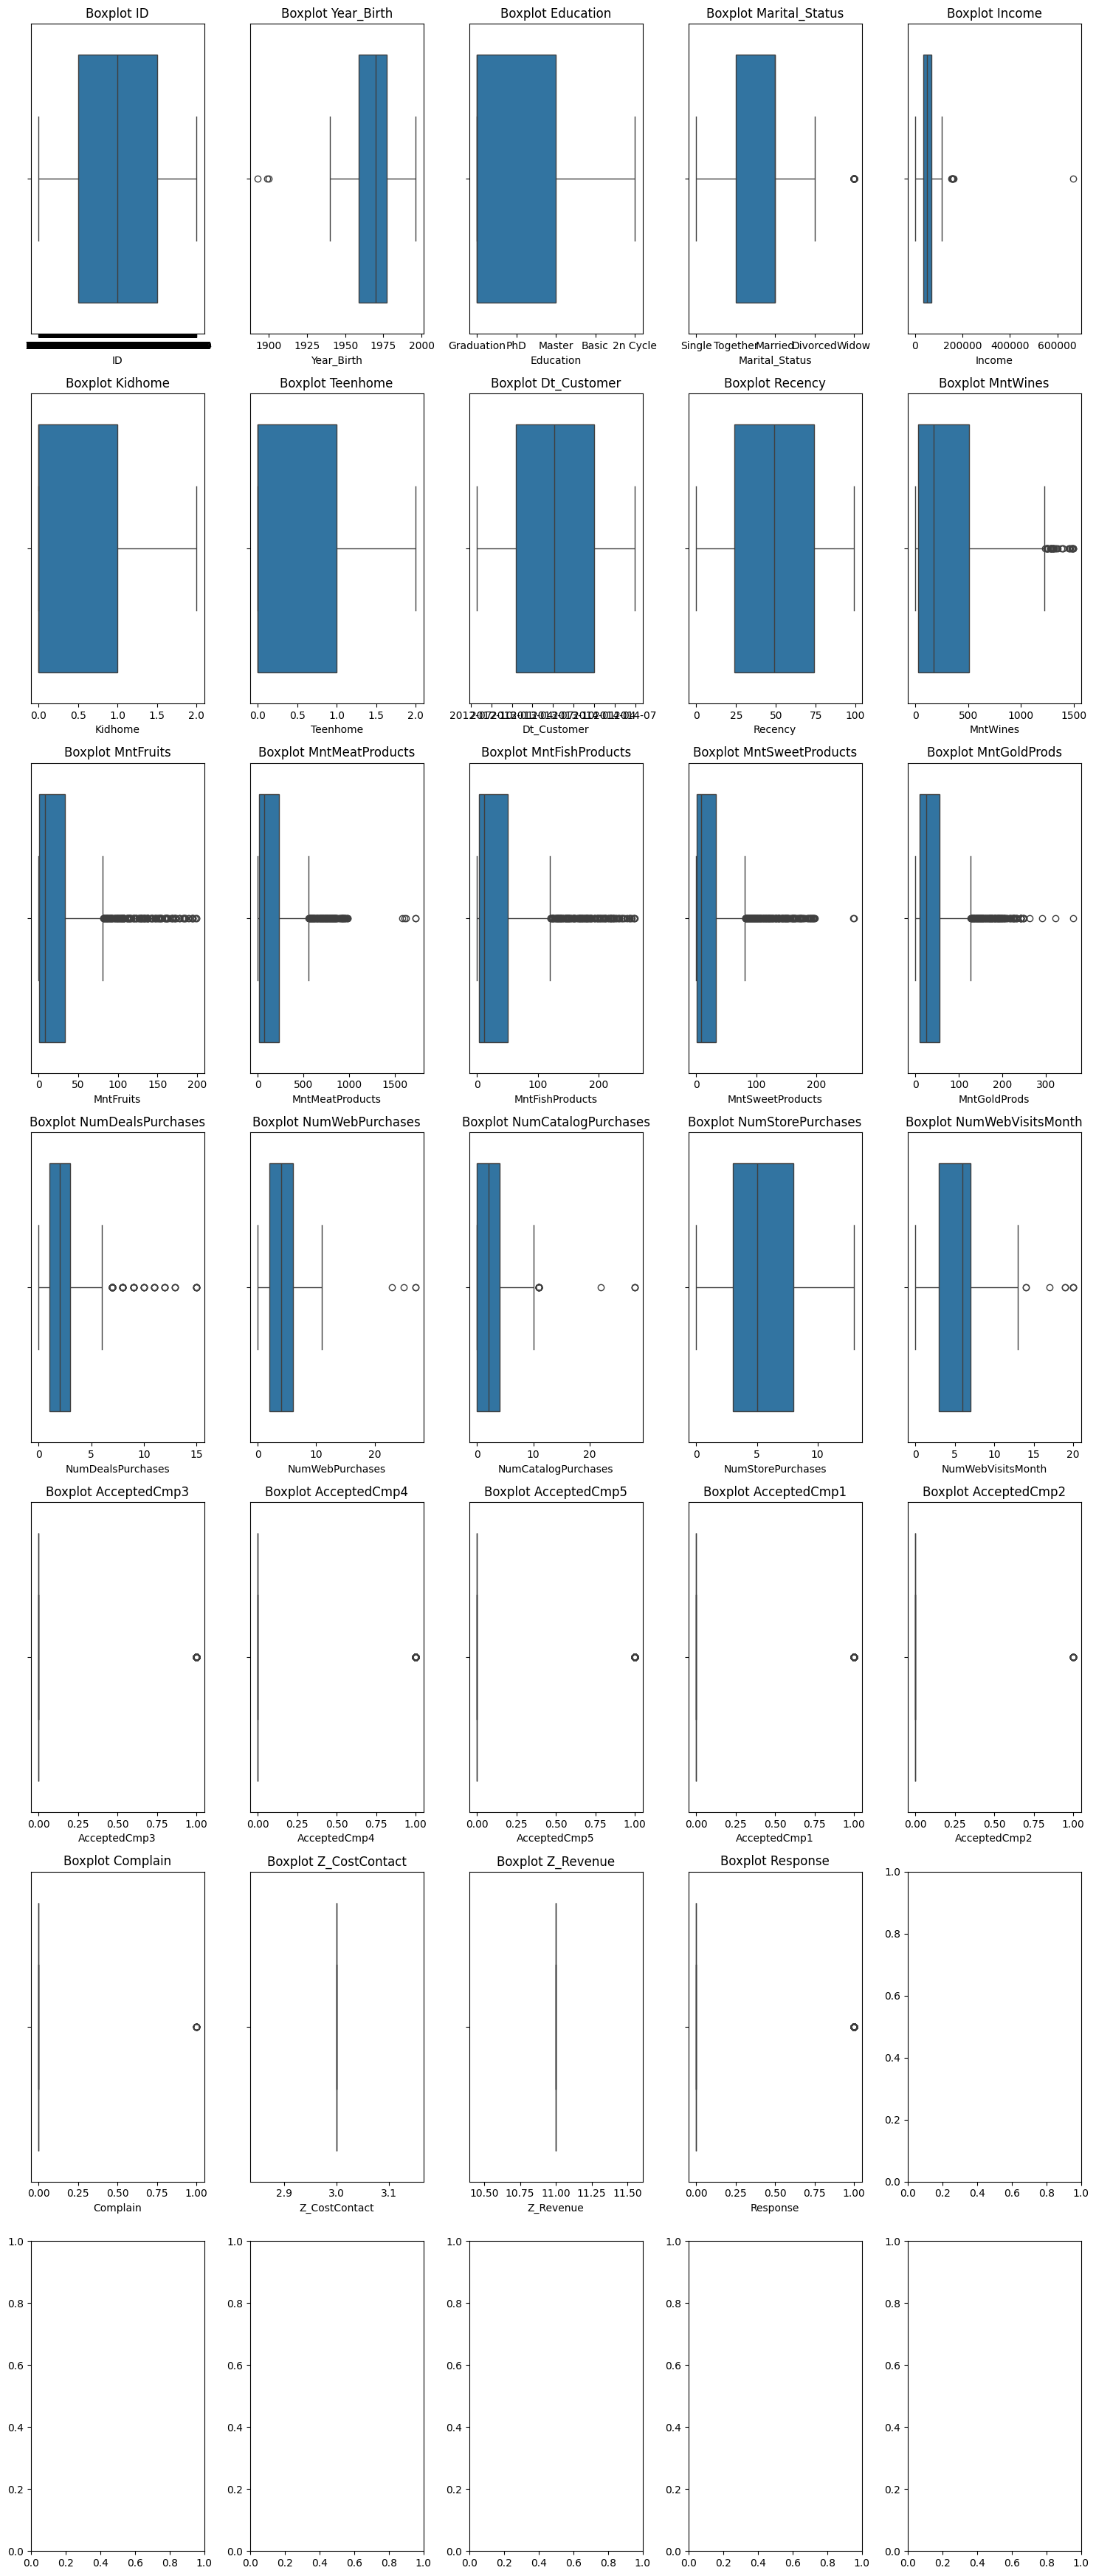

In [19]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(15, 35)) # Changed ncols to 5 to accommodate 29 plots
axes = axes.flatten()

# Daftar kolom yang akan divisualisasikan
columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

# Membuat boxplot untuk setiap fitur
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot {col}")

# Menyesuaikan tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

- Terdapat outlier pada kolom 'Income' yang sangat besar dan jauh dibandingkan data lainnya
- Terdapat outlier yang tidak masuk akal pada kolom 'Year_Birth', karena tanggal lahir tidak masuk akal (usia >= 113 tahun saat mendaftar member)


**Drop outlier kolom Income**

In [20]:
df[df['Income']==df['Income'].max()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


In [21]:
df = df.drop(df[df['Income'] == df['Income'].max()].index)


**Drop outlier kolom Year_Birth**

In [22]:
df[df['Year_Birth']<1940]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


In [23]:
df = df[df['Year_Birth'] >= 1940]

In [24]:
df.shape

(2232, 29)

**Inisialisasi var product_colums dan place_columns yang akan digunakan di analisis data, serta membuat kolom baru 'TotalSpending'**

In [25]:
# total pengeluaran produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpending'] = df[product_columns].sum(axis=1)

In [26]:
place_columns = [ 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases']

# **LRFM**

LRFM adalah singkatan dari Length, Recency, Frequency, Monetary. Ini adalah teknik analisis pemasaran yang digunakan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka. Berikut merupakan penjelasan dari tiap komponennya:

`L (Length):` Lama durasi hubungan pelanggan dengan perusahaan, yaitu berapa lama seorang pelanggan telah terdaftar atau berlangganan sejak pertama kali bergabung. Pelanggan yang sudah lama berhubungan dengan perusahaan dan kemungkinan besar sudah menjadi pelanggan setia.

`R (Recency):` Mengukur seberapa baru pelanggan melakukan pembelian atau interaksi dengan perusahaan. Diukur dari jumlah hari sejak pembelian terakhir. Semakin rendah nilainya berarti pelanggan aktif dan kemungkinan besar masih tertarik dengan produk atau layanan.

`F (Frequency):` Mengukur seberapa sering pelanggan melakukan pembelian dalam periode waktu tertentu. Pelanggan dengan nilai frequency tinggi berarti pelanggan sering melakukan pembelian yang menandakan mereka adalah pelanggan yang aktif dan loyal.

`M (Monetary):` Mengukur total uang yang dibelanjakan pelanggan dalam periode waktu tertentu, menunjukkan seberapa banyak pelanggan tersebut berkontribusi pada pendapatan perusahaan. Pelanggan dengan nilai menetary tinggi berarti pelanggan menghabiskan banyak uang, menunjukkan mereka sebagai pelanggan bernilai tinggi yang sangat menguntungkan.

### **Length**

- Mengukur lamanya hubungan antara pelanggan dan perusahaan
- Pada data ini length dihitung dari Dt_Customer (tanggal pelanggan mulai bergabung)

Diasumsikan analisis dilakukan pada jumlah hari paling maks kolom recency (diambil skenario terburuk dengan mengambil tanggal pendaftaran terbaru diasumsikan memiliki nilai recency terbesar)

In [27]:
r_max=int(df[['Recency']].max().iloc[0])
r_max

99

In [28]:
analysis_date = df['Dt_Customer'].max() + datetime.timedelta(days=r_max)
analysis_date

Timestamp('2014-10-06 00:00:00')

Diambil jumlah hari dari customer mendaftar hingga hari analisis data dilakukan, jumlah hari tersebut dimasukkan ke dalam kolom length. Baris pada setiap data memiliki ID yang berbeda yang berarti masing-masing baris merupakan customer yang berbeda

In [29]:
df_length = (analysis_date - df['Dt_Customer']).dt.days

df['length']=df_length

df_length.sample(5, random_state=42)

,Dt_Customer
1659,105
1415,483
483,341
620,452
1078,257


Pada tabel diketahui pelanggan dengan ID 1656 merupakan member yang baru bergabung menjadi member toko sejak 105 hari lalu, sedangkan pelanggan dengan ID 1412 sudah bergabung sejak 483 hari lalu yang menunjukkan kemungkinan besar pelanggan tersebut sudah menjadi pelanggan setia


### **Recency**

- Mengukur seberapa baru pembelian terakhir pelanggan.
- Digunakan data pada kolom 'Recency'

In [30]:
df_recency=df[['Recency']]
df['Recency']=df_recency
df_recency.sample(5, random_state=42)

,Recency
1659,55
1415,83
483,30
620,23
1078,9


Nilai recency yang semakin kecil semakin baik karena berarti pelanggan tersebut baru-baru ini melakukan transaksi. Pada tabel diketahui pelanggan dengan ID 1075 baru melakukan transaksi 9 hari lalu dan sudah melakukan pendaftaran member sejak 257 hari lalu, kemungkinan pelanggan aktif dan tertarik dengan produk. Sedangkan pelanggan dengan ID 1412 sudah lama tidak berbelanja di toko (83 hari lalu) hal ini dapat dikaitkan dengan penurunan minat berbelanja di toko

### **Frequency**

- Mengukur seberapa sering pelanggan melakukan pembelian
- Digunakan penjumlahan kolom:
  - NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
  - NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
  - NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko

In [31]:
df_frequency = df.groupby('ID').agg(
    web_purchases=('NumWebPurchases', 'sum'),
    catalog_purchases=('NumCatalogPurchases', 'sum'),
    store_purchases=('NumStorePurchases', 'sum')
)

df_frequency['frequency'] = df_frequency.sum(axis=1)

df = df.merge(df_frequency[['frequency']], on='ID', how='left')

In [32]:
df['frequency'].sample(5, random_state=42)

,frequency
1656,16
1412,15
480,11
617,14
1075,13


Pada tabel diketahui pelanggan dengan ID 1656 melakukan transaksi sebanyak 16 kali meskipun merupakan member terbaru dibandingkan sample lainnya, hal ini menunjukkan potensi loyalitas yang tinggi

### **Monetary**

- Mengukur total nilai uang yang dihabiskan pelanggan.
- Digunakan penjumlahan kolom:
  - MntWines: Jumlah yang dibelanjakan untuk anggur dalam 2 tahun terakhir
  - MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
  - MntMeatProducts: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir
  - MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir
  - MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
  - MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

In [33]:
df_monetary = df.groupby('ID').agg(
    monetary_wines=('MntWines', 'sum'),
    monetary_fruits=('MntFruits', 'sum'),
    monetary_meat=('MntMeatProducts', 'sum'),
    monetary_fish=('MntFishProducts', 'sum'),
    monetary_sweets=('MntSweetProducts', 'sum'),
    monetary_gold=('MntGoldProds', 'sum')
)

df_monetary['monetary'] = df_monetary.sum(axis=1)

df = df.merge(df_monetary[['monetary']], on='ID', how='left')


In [34]:
df['monetary'].sample(5, random_state=42)

,monetary
1656,1792
1412,545
480,266
617,404
1075,396


Selain memiliki frekuensi produk terbesar, pelanggan dengan ID 1565 memiliki nilai transaksi yang sangat besar, sebesar $1792

### **Analysis**


In [35]:
df_customer = df.groupby('ID').agg(
    length=('length', 'first'),
    recency=('Recency', 'first'),
    frequency=('frequency', 'sum'),
    monetary=('monetary', 'sum')
)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary
ID,,,,
7212,120,99,5,65
6059,581,81,18,1314
1990,700,74,16,1797
2563,113,80,5,43
4597,461,67,18,2018


### **Assigning Scores**

Pada kasus ini dilakukan assigning score menggunakan metode statistical untuk semua elemen pada lrfm, metode ini digunakan untuk memberikan penilaian yang objektif dan konsisten berdasarkan distribusi data

**Length Segmentation**

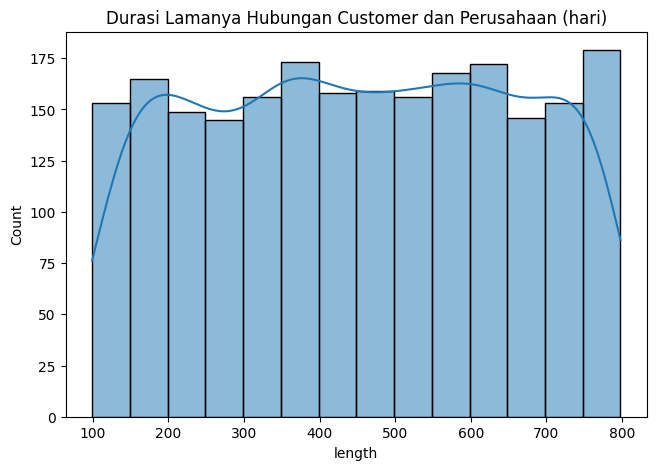

,length
0.00,99.00
0.25,279.75
0.50,454.50
0.75,627.25
1.00,798.00


In [36]:
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.histplot(data=df_customer, x='length', kde=True)

ax.set_title('Durasi Lamanya Hubungan Customer dan Perusahaan (hari)')

plt.show()

display(df_customer['length'].quantile([0, 0.25, 0.5, 0.75, 1]))


Berdasarkan distribusi di atas, customer dikelompokan menjadi 4 kelompok berdasarkan length-nya:
- 4 (Loyalist): telah bergabung lebih dari 627 hari, customer menunjukkan komitmen jangka panjang dan loyalitas terhadap perusahaan.

- 3 (Established): telah bergabung antara 454 hingga 627 hari terakhir, customer sudah cukup lama bergabung dan mulai menunjukkan keterlibatan yang stabil

- 2 (Growing): telah bergabung antara 279 hingga 454 hari terakhir, Customer yang mulai menunjukkan keterlibatan dan loyalitas terhadap brand

- 1 (Newcomer) : baru bergabung antara 99 hingga 279 hari terakhir, customer baru yang masih dalam tahap eksplorasi dan pengenalan terhadap perusahaan

In [37]:
df_customer['l_score'] = pd.qcut(
    df_customer['length'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score
ID,,,,,
7212,120,99,5,65,1
6059,581,81,18,1314,3
1990,700,74,16,1797,4
2563,113,80,5,43,1
4597,461,67,18,2018,3


**Recency Segmentation**

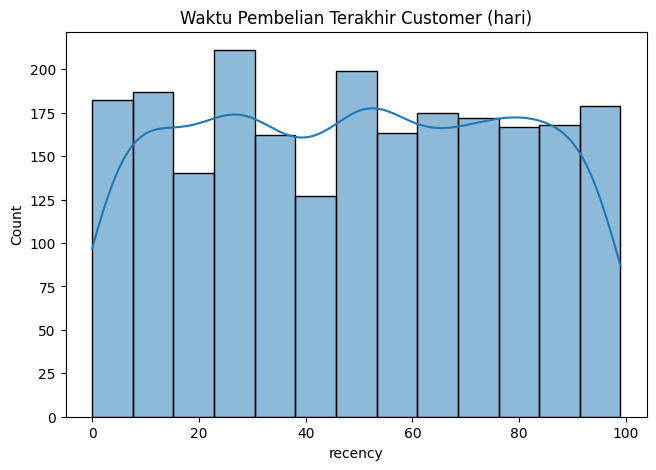

,recency
0.00,0.0
0.25,24.0
0.50,49.5
0.75,74.0
1.00,99.0


In [38]:
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.histplot(data=df_customer, x='recency', kde=True)

ax.set_title('Waktu Pembelian Terakhir Customer (hari)')

plt.show()

display(df_customer['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))


Berdasarkan distribusi di atas, customer dikelompokan menjadi 4 kelompok berdasarkan recency-nya:
- 4 (Very Active): melakukan transaksi kurang dari 24 hari terakhir, Customer yang baru saja bertransaksi dan menunjukkan keterlibatan tinggi terhadap perusahaan.

- 3 (Active): melakukan transaksi antara 24 hingga 49 hari terakhir, Customer yang masih cukup sering melakukan transaksi dan terbilang aktif.

- 2 (Less Active): melakukan transaksi antara 49 hingga 74 hari terakhir, Customer yang mulai jarang bertransaksi dan menunjukkan penurunan aktivitas.

- 1 (Inactive): melakukan transaksi lebih dari 74 hari terakhir, Customer yang sudah lama tidak bertransaksi dan perlu pendekatan ulang.

Pada recency semakin kecil nilainya, skor yang diberikan semakin besar

In [39]:
df_customer['r_score'] = pd.qcut(
    df_customer['recency'],
    q=4,
    labels=[4,3,2,1]
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score
ID,,,,,,
7212,120,99,5,65,1,1
6059,581,81,18,1314,3,1
1990,700,74,16,1797,4,2
2563,113,80,5,43,1,1
4597,461,67,18,2018,3,2


**Frequency Segmentation**

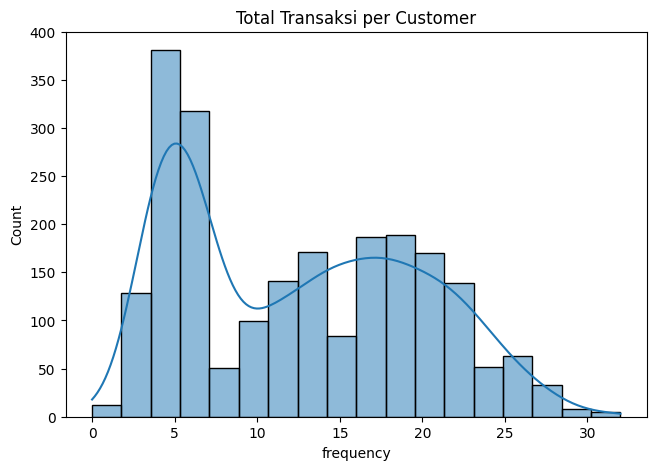

,frequency
0.00,0.0
0.25,6.0
0.50,12.0
0.75,18.0
1.00,32.0


In [40]:
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.histplot(data=df_customer, x='frequency', kde=True)

ax.set_title('Total Transaksi per Customer')

plt.show()

display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))


Berdasarkan distribusi di atas, customer dikelompokan menjadi 4 kelompok berdasarkan frequency-nya:
- 4 (Frequent): melakukan transaksi lebih dari 18 kali, Customer yang sangat sering bertransaksi dan memiliki tingkat keterlibatan tinggi

- 3 (Regular): melakukan transaksi 12 hingga 18 kali, Customer yang cukup sering melakukan transaksi

- 2 (Occasional): melakukan transaksi 6 hingga 12 kali, Customer yang bertransaksi secara berkala namun tidak terlalu rutin.

- 1 (Rare): melakukan transaksi kurang dari 6 kali, Customer yang jarang melakukan transaksi dan tingkat keterlibatannya rendah.

In [41]:
df_customer['f_score'] = pd.qcut(
    df_customer['frequency'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score
ID,,,,,,,
7212,120,99,5,65,1,1,1
6059,581,81,18,1314,3,1,3
1990,700,74,16,1797,4,2,3
2563,113,80,5,43,1,1,1
4597,461,67,18,2018,3,2,3


**Monetary Segmentation**

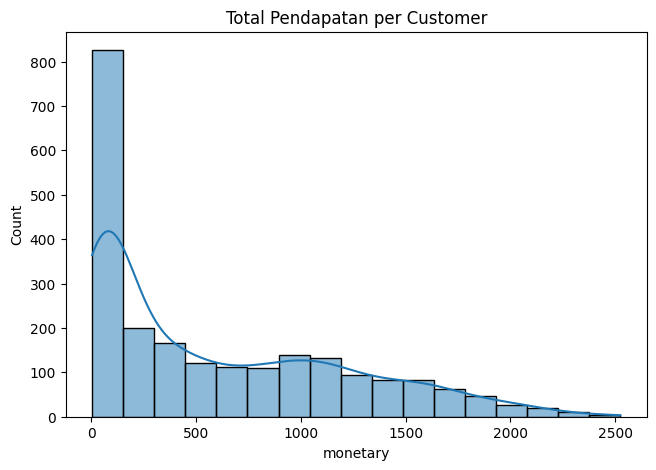

,monetary
0.00,5.00
0.25,69.00
0.50,396.00
0.75,1044.25
1.00,2525.00


In [42]:
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.histplot(data=df_customer, x='monetary', kde=True)

ax.set_title('Total Pendapatan per Customer')

plt.show()

display(df_customer['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))


Berdasarkan distribusi di atas, customer dikelompokan menjadi 4 kelompok berdasarkan monetary-nya:
- 4 (High Spender): melakukan transaksi lebih dari 1044.25 dollar, Customer dengan nilai transaksi sangat tinggi yang berkontribusi besar terhadap pendapatan.

- 3 (Medium Spender): melakukan transaksi antara 396 hingga 1044.25 dollar, Customer dengan nilai transaksi menengah dan cukup berpengaruh bagi pendapatan perusahaan.

- 2 (Low Spender): melakukan transaksi antara 69 hingga 396 dollar, Customer dengan nilai transaksi rendah dengan kontribusi pendapatan yang tidak terlalu besar.

- 1 (Minimal Spender): melakukan transaksi kurang dari 69 dollar, Customer dengan nilai transaksi sangat kecil dan perlu strategi peningkatan nilai.

In [43]:
df_customer['m_score'] = pd.qcut(
    df_customer['monetary'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
ID,,,,,,,,
7212,120,99,5,65,1,1,1,1
6059,581,81,18,1314,3,1,3,4
1990,700,74,16,1797,4,2,3,4
2563,113,80,5,43,1,1,1,1
4597,461,67,18,2018,3,2,3,4


### **Labelling Segment**

Setelah skor dari setiap elemen lrfm telah ditentukan, dulakukan segmentasi customer dengan metode combining individual scores approach. Metode ini digunakan karena metode ini memungkinkan segmentasi yang lebih terperinci dengan mempertimbangkan gabungan dari keempat aspek perilaku customer (Length, Recency, Frequency, dan Monetary) dan dapat disesuaikan kebutuhan bisnis, seperti fokus pada pelanggan bernilai tinggi atau pelanggan yang berpotensi.

**Combining Individual Scores Approach**

Skor length, recency, frequency, dan monetary digabungkan ke dalam 1 variabel lrfm_score_combined

In [44]:
df_customer['lrfm_score_combined'] = df_customer['l_score'].astype(str) + df_customer['r_score'].astype(str) + df_customer['f_score'].astype(str) + df_customer['m_score'].astype(str)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined
ID,,,,,,,,,
7212,120,99,5,65,1,1,1,1,1111
6059,581,81,18,1314,3,1,3,4,3134
1990,700,74,16,1797,4,2,3,4,4234
2563,113,80,5,43,1,1,1,1,1111
4597,461,67,18,2018,3,2,3,4,3234


Hasil Scorring dikelompokkan ke dalam 8 segmen berikut:

In [45]:
seg_map = {
    r'[1-2][1-4][1-4][1-2]': 'Prospect Customer',
    r'[1-2][1-4][1-4][3-4]': 'High Potential Prospect',
    r'[3-4][1-2][1-2][1-2]': 'Inactive Customer',
    r'[3-4][1-2][1-4][1-4]': 'At Risk Customer',
    r'[3-4][1-2][3-4][3-4]': 'Needs Attention',
    r'[3-4][3-4][3-4][3-4]': 'Loyal Customer',
    r'[3-4][3-4][3-4][1-2]': 'Potential Loyal Customer',
    r'[3-4][3-4][1-2][1-4]': 'Reactivated Old Customer'
}

df = df.merge(df_customer[['l_score', 'r_score', 'f_score', 'm_score']], on='ID', how='left')

df['lrfm_score_combined'] = df['l_score'].astype(str) + df['r_score'].astype(str) + df['f_score'].astype(str) + df['m_score'].astype(str) #Creating lrfm_score_combined for df

df_customer['lrfm_segment_combined'] = df_customer['lrfm_score_combined'].replace(seg_map, regex=True)
df['lrfm_segment_combined'] = df['lrfm_score_combined'].replace(seg_map, regex=True)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
ID,,,,,,,,,,
7212,120,99,5,65,1,1,1,1,1111,Prospect Customer
6059,581,81,18,1314,3,1,3,4,3134,At Risk Customer
1990,700,74,16,1797,4,2,3,4,4234,At Risk Customer
2563,113,80,5,43,1,1,1,1,1111,Prospect Customer
4597,461,67,18,2018,3,2,3,4,3234,At Risk Customer


In [46]:
df_customer['lrfm_segment_combined'].value_counts()

,count
lrfm_segment_combined,
Prospect Customer,627
High Potential Prospect,489
At Risk Customer,339
Loyal Customer,282
Reactivated Old Customer,253
Inactive Customer,235
Potential Loyal Customer,7


Karakteristik dari setiap segmen divisualisasikan ke dalam heatmap:

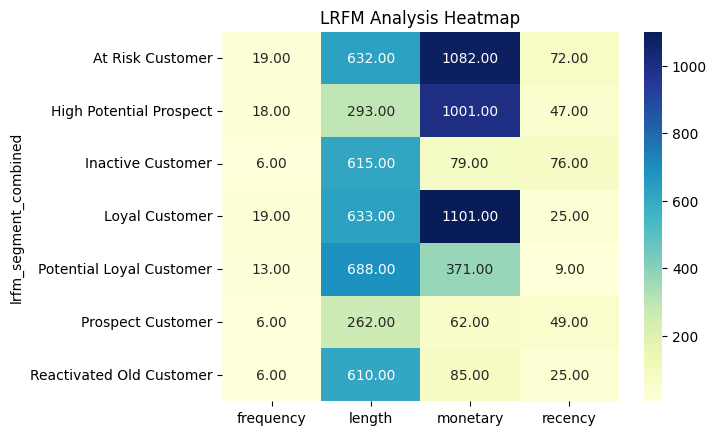

In [47]:
lrfm_heatmap = df_customer.pivot_table(index='lrfm_segment_combined', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

- **Loyal Customer** memiliki monetary tertinggi, length dan frequency tinggi, serta recency sangat rendah. Hal ini menunjukkan bahwa mereka sering bertransaksi, mengeluarkan banyak uang, dan baru saja melakukan transaksi terakhir.  

- **At Risk Customer** memiliki monetary sangat tinggi dan frequency cukup tinggi, tetapi recency besar, Artinya, mereka memiliki riwayat transaksi besar, tetapi sudah lama tidak bertransaksi.  

- **High Potential Prospect** memiliki nilai monetary sangat tinggi dan frequency cukup tinggi, serta recency masih cukup rendah. Ini menunjukkan bahwa mereka baru bergabung tetapi langsung aktif bertransaksi dengan nilai besar.  

- **Potential Loyal Customer** memiliki length tertinggi, frequency cukup tinggi, dan recency sangat rendah. Hal ini menunjukkan bahwa mereka sudah lama menjadi pelanggan dan baru saja melakukan transaksi, tetapi nilai transaksi mereka masih menengah (monetary 371.00).  

- **Prospect Customer** memiliki monetary sangat rendah, frequency rendah, dan recency cukup rendah. Hal ini berarti mereka baru bergabung tetapi masih jarang bertransaksi dan memiliki nilai transaksi kecil.  

- **Reactivated Old Customer** memiliki monetary rendah, frequency rendah, tetapi recency sangat rendah.  Ini menunjukkan bahwa mereka sebelumnya sudah lama tidak bertransaksi tetapi baru saja kembali aktif.  

- **Inactive Customer** memiliki monetary sangat rendah, frequency sangat rendah, dan recency sangat tinggi. Ini menunjukkan bahwa mereka sudah sangat lama tidak bertransaksi dan hampir tidak aktif.  

In [48]:
# df.to_excel
df.to_csv('SupermarketCustomersCleaned.csv')

# **Data Analysis**

**Cek Distribusi Data**

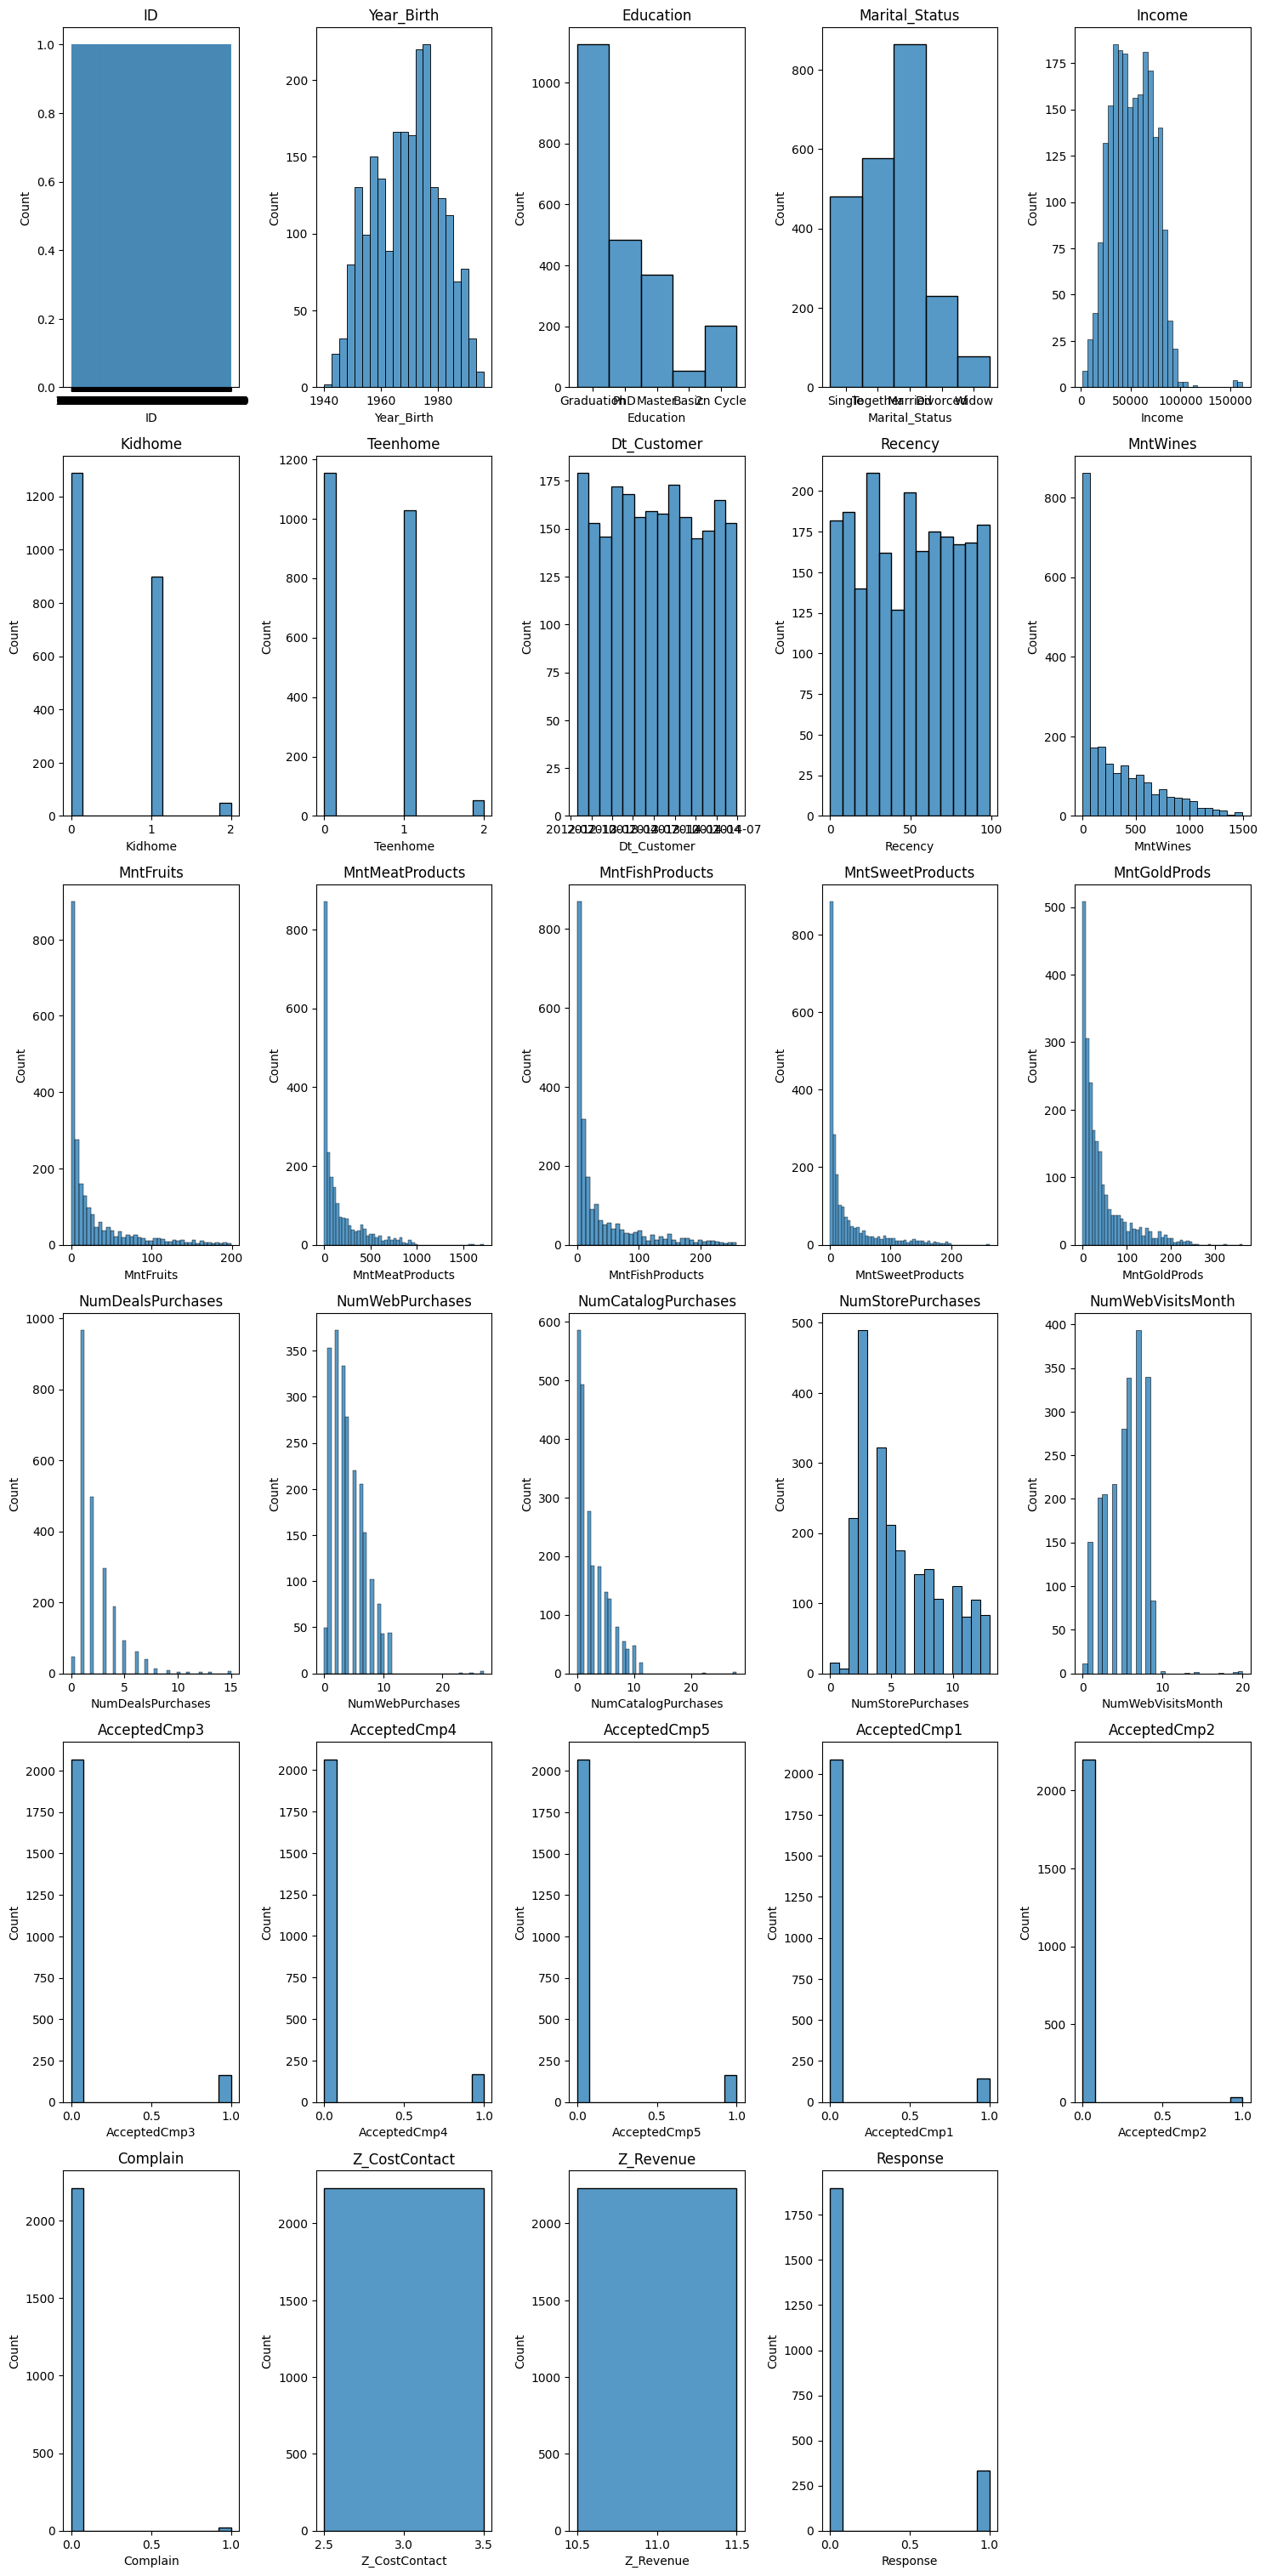

In [49]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(15, 35)) # Changed nrows and ncols for 29 plots + removed extra empty plots
axes = axes.flatten()

columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# remove extra empty plots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [50]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpending,length,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,762,22,1617,4,2,4,4,4244,At Risk Customer
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,212,4,27,1,3,1,1,1311,Prospect Customer
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,411,20,776,2,3,4,3,2343,High Potential Prospect
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,238,6,53,1,3,1,1,1311,Prospect Customer
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,260,14,422,1,1,3,3,1133,High Potential Prospect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1341,480,16,1341,3,3,3,4,3334,Loyal Customer
2228,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,444,118,15,444,1,2,3,3,1233,High Potential Prospect
2229,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1241,254,18,1241,1,1,3,4,1134,High Potential Prospect
2230,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,843,255,21,843,1,4,4,3,1443,High Potential Prospect


**Cek Normalitas Menggunakan Shapiro Wilk Test**

In [51]:
columns_to_test = [
    'ID', 'Year_Birth', 'Income', 'Kidhome',
    'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'
]
df2=df.copy()
results = {}
for col in columns_to_test:
    try:
        if df2[col].dtype == 'O':
            df2[col] = pd.to_numeric(df2[col], errors='coerce')
        elif 'datetime' in str(df2[col].dtype):
            df2[col] = df2[col].astype('int64')
        data = df2[col].dropna()
        stat, p = shapiro(data)
        results[col] = f"p-value: {p} → {'Normal' if p > 0.05 else 'Tidak Normal'}"
    except Exception as e:
        results[col] = f"Error: {e}"

for col, res in results.items():
    print(f"{col}: {res}")


ID: p-value: 6.723598444227183e-26 → Tidak Normal
Year_Birth: p-value: 1.5721429079624242e-15 → Tidak Normal
Income: p-value: 2.3839012390105766e-19 → Tidak Normal
Kidhome: p-value: 3.9640161677949937e-54 → Tidak Normal
Teenhome: p-value: 3.3993941771538698e-53 → Tidak Normal
Dt_Customer: p-value: 8.896713166634511e-26 → Tidak Normal
Recency: p-value: 6.171753547031255e-26 → Tidak Normal
MntWines: p-value: 6.286252321821274e-43 → Tidak Normal
MntFruits: p-value: 1.708019971895817e-53 → Tidak Normal
MntMeatProducts: p-value: 4.1778875605253865e-51 → Tidak Normal
MntFishProducts: p-value: 2.339257200362773e-52 → Tidak Normal
MntSweetProducts: p-value: 1.3524496969591723e-53 → Tidak Normal
MntGoldProds: p-value: 1.3551578197639471e-48 → Tidak Normal
NumDealsPurchases: p-value: 1.647779873618138e-50 → Tidak Normal
NumWebPurchases: p-value: 3.393067195422983e-36 → Tidak Normal
NumCatalogPurchases: p-value: 5.5092905067383565e-45 → Tidak Normal
NumStorePurchases: p-value: 2.825804890293514e-

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Berdasarkan hasil cek normalitas data menggunakan metode statistika deskriptif dan inferensial, didapatkan hasil distribusi tidak normal untuk semua kolom data

# **Berdasarkan Produk**

### Total Pembelian Pelanggan per Jenis Produk

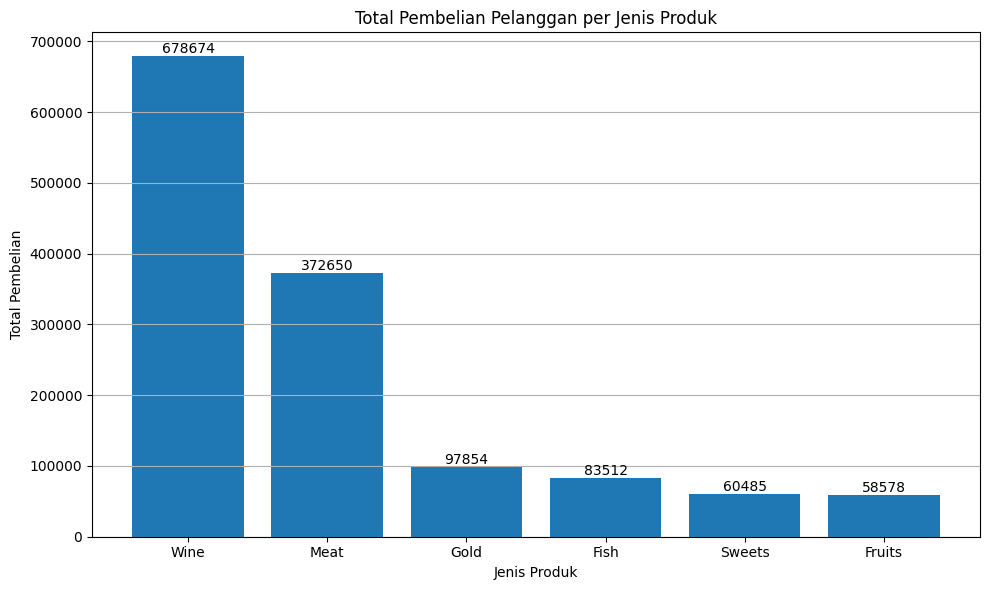

In [52]:
produk = {
    'Wine': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Meat': df['MntMeatProducts'].sum(),
    'Fish': df['MntFishProducts'].sum(),
    'Sweets': df['MntSweetProducts'].sum(),
    'Gold': df['MntGoldProds'].sum()
}

sorted_produk = dict(sorted(produk.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_produk.keys(), sorted_produk.values())

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10, f'{int(height)}', ha='center', va='bottom')

plt.title('Total Pembelian Pelanggan per Jenis Produk')
plt.xlabel('Jenis Produk')
plt.ylabel('Total Pembelian')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Insight dan Analisis**

1. Produk Wine adalah yang paling banyak dibeli (678.674 dolar), menunjukkan minat tinggi terhadap produk ini. Ini kemungkinan karena kebiasaan konsumsi dan harga produk yang cukup tinggi.
2. Produk Daging (Meat) menempati urutan kedua (374.650 dolar)
3. Produk lainnya seperti Fruits, Sweets, dan Fish memiliki total penjualan yang rendah. Hal ini bisa disebabkan produk tersebut bukan menjadi prioritas untuk dibeli atau mereka membelinya di tempat lain

### Nilai Korelasi antar Jenis Produk
Nilai korelasi antar produk ini dapat digunakan untuk menentukan produk mana yang cenderung akan dibeli oleh konsumen jika konsumen tersebut suka membeli suatu produk tertendu, nilai korelasi ini dapat dijadikan juga acuan untuk menentukan produk mana saja yang cocok dijadikan bundle promosi satu sama lain

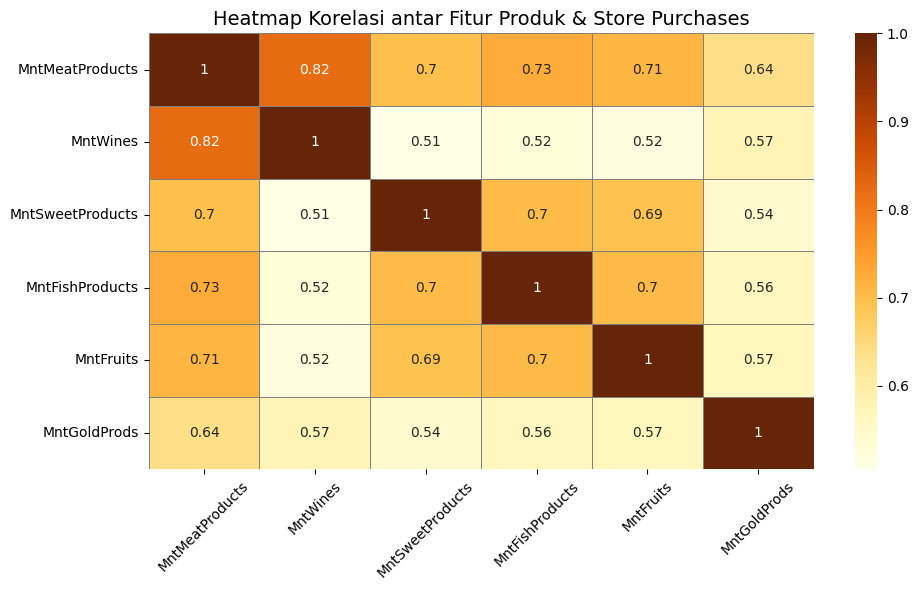

In [53]:
df_subset = df[[
    'MntMeatProducts',
    'MntWines',
    'MntSweetProducts',
    'MntFishProducts',
    'MntFruits',
    'MntGoldProds'
]]

correlation_matrix = df_subset.corr('spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.5, linecolor='gray')
plt.title('Heatmap Korelasi antar Fitur Produk & Store Purchases', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight**
1. **MntFruits** berkorelasi positif sedang dengan MntMeatProduct (0.54), MntSweetProducts (0.57), dan MntFishProducts (0.59)
2. **MntFishProducts** berkorelasi positif sedang dengan MntMeatProduct (0.57), MntSweetProducts (0.58), dan MntFruits (0.59)
3. **MntSweetProducts** berkorelasi positif sedang dengan MntMeatProduct (0.52), MntFishProducts (0.58), dan MntFruits (0.57)
4. **MntWines** berkorelasi positif sedang dengan MntMeatProduct (0.56)
5. **MntMeatProduct** berkorelasi positif sedang dengan semua produk lainnya

### Pembelian Produk Berdasarkan Status Pernikahan


**Hitung median umur** pada setiap segmen Status Pernikahan untuk analisis lebih lanjut

In [54]:
df['Age'] = (analysis_date - pd.to_datetime(df['Year_Birth'], format='%Y')).dt.days // 365

<ipython-input-55-01752fb51cd5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=birth_by_marital, x='Marital_Status', y='Age', palette='viridis')


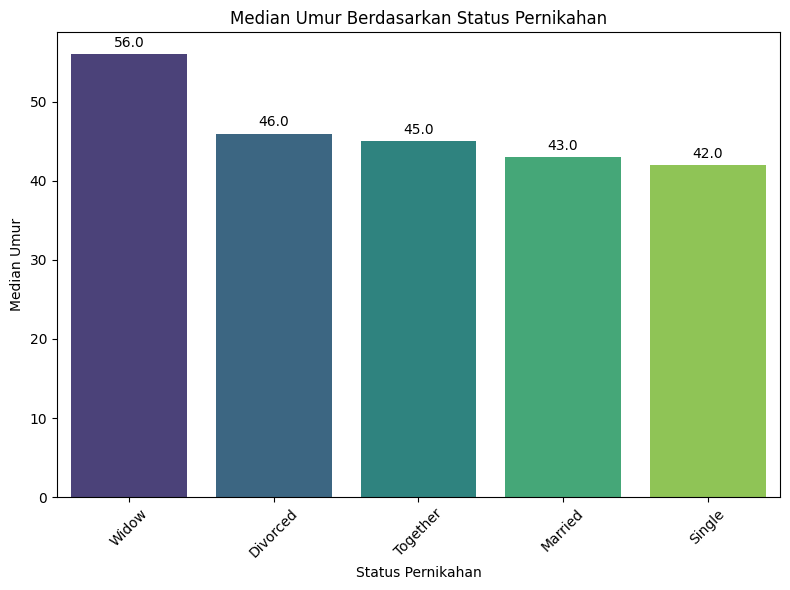

In [55]:
birth_by_marital = df.groupby('Marital_Status')['Age'].median().reset_index()
birth_by_marital = birth_by_marital.sort_values(by='Age', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=birth_by_marital, x='Marital_Status', y='Age', palette='viridis')

plt.title('Median Umur Berdasarkan Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Median Umur')
plt.xticks(rotation=45)
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i, fmt='%.1f', label_type='edge', padding=3)

plt.show()


<Figure size 1200x600 with 0 Axes>

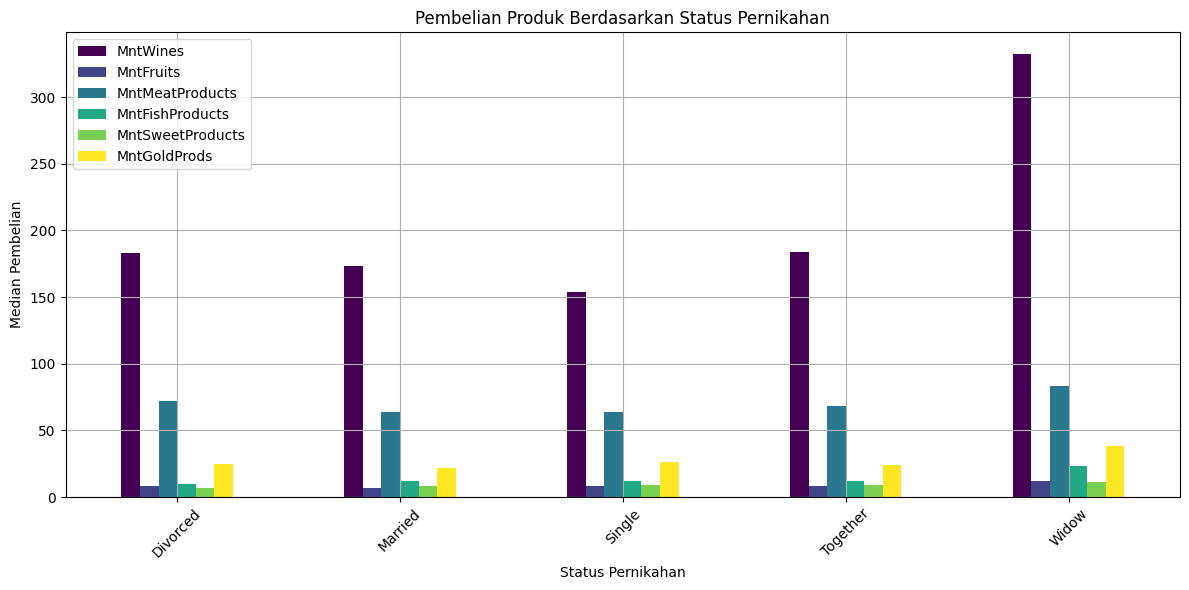

In [56]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('Marital_Status')[product_columns].median()
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='viridis')
plt.title('Pembelian Produk Berdasarkan Status Pernikahan')
plt.ylabel('Median Pembelian')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight**
1. Status "Widow" memiliki pengeluaran tertinggi pada hampir semua kategori produk (Terutama pada Kategori Wines)

2. Produk wine (MntWines) menjadi produk dengan pengeluaran tertinggi di semua kategori status pernikahan

3. Pengeluaran untuk produk emas (MntGoldProds) cenderung lebih banyak pada status pernikahan Divorced, Single, dan Widow

4. Status Single memiliki pengeluaran paling rendah dibandingkan kategori lainnya

5. Pengeluaran untuk produk protein meat jauh lebih besar dibandingkan produk fish

**Analisis**

1. Status "Widow" cenderung memiliki usia lebih tua dan kemungkinan memiliki penghasilan tetap (pensiun, warisan, atau tidak ada tanggungan). Hal ini menjadi kecenderungan untuk membeli produk dengan kualitas lebih baik yang memiliki harga lebih tinggi. Selain itu, karena konsumen dengan status "widow" ini biasanya tidak memiliki tanggungan keluarga, mereka lebih dapat membeli barang non-esensial (seperti wine) dibandingkan status pernikahan lainnya
  
2. Wine adalah produk yang sering digunakan dalam acara sosial, yang bisa saja menyebabkan tingginya permintaan terhadap wine. Harga dari produk wine sendiri cukup tinggi, sehingga total pengeluaran yang dikeluarkan akan cenderung besar

3. Konsumen dengan status divorced, single, dan widow cenderung memiliki kontrol penuh atas keuangan pribadi, konsumen dengan status pernikahan ini cenderung tidak memiliki tanggungan keluarga yang banyak sehingga dapat melakukan pembelian produk eksklusif seperti untuk diinvestasikan atau sebagai kepuasan pribadi

4. Status Single memiliki pengeluaran paling rendah bisa disebabkan karena umur yang lebih muda dibandingkan status pernikahan lainnya, penghasilan terbatas, atau prioritas pengeluaran ke arah lain (misalnya pendidikan). Konsumen dengan status ini juga biasanya cenderung menyukai produk yang sedang promo

5. Produk daging merupakan protein yang cenderung dipilih untuk dimakan harian dibandingkan ikan, daging lebih dipilih karena preferensi rasa, ketersediaan, atau budaya makan. Ikan mungkin dianggap sebagai makanan alternatif atau tidak umum dikonsumsi harian oleh mayoritas konsumen.


**Rekomendasi**

1. Tawarkan produk eksklusif untuk produk Wine untuk mempertahankan atau memaksimalkan ROI (Return on Investment) perusahaan, terutama untuk konsumen dengan segmen status pernikahan "Widow".
2. Berikan loyalty point khusus untuk pembelian wine untuk memancing pembelian secara rutin
2. Dorong konsumen untuk membeli produk daily dengan kuantitas yang lebih banyak, seperti memberikan promo bundle produk harian atau diskon saat membeli produk dalam kuantitas tertentu
3. Tampilkan produk daging sebagai produk daily essentials untuk mendorong repeat purchase.
4. Berikan notifikasi khusus untuk berinvestasi/melakukan pembelian secara rutin produk emas, terutama kepada konsumen dengan status divorced, single, dan widow


### Pembelian Produk Berdasarkan Kategori Pendapatan

Pengaruh kenaikan Pendapatan terhadap Pengeluaran

<ipython-input-57-e3201377adc0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Income', y='TotalSpending', data=df, palette='coolwarm')


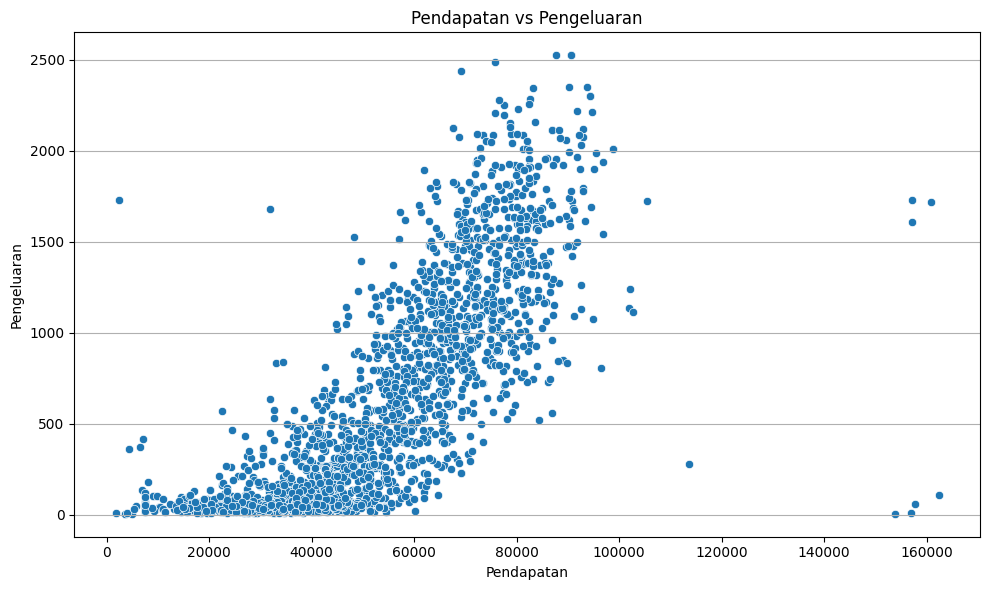

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df, palette='coolwarm')

plt.title('Pendapatan vs Pengeluaran')
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Insight**

1. Pendapatan dan pengeluaran berkolerasi positif. Semakin tinggi pendapatan, semakin tinggi pula total pengeluaran mereka.

2. Mayoritas pelanggan memiliki pendapatan antara 40.000–90.000 dan pengeluaran di bawah 2000

3. Terdapat beberapa pelanggan dengan pendapatan sangat tinggi (>120.000) tapi pengeluarannya rendah. Ini merupakan pelanggan berpotensi namun belum termanfaatkan secara maksimal oleh strategi pemasaran saat ini.

**Rekomendasi**

1. Targetkan Pelanggan Berpendapatan Tinggi dengan Pengeluaran Rendah dengan memberikan insentif seperti diskon eksklusif atau loyalty program agar mereka mulai berbelanja lebih banyak.
2. Karena sebagian besar pelanggan berada di kisaran menengah (60.000–80.000), fokuskan promosi ke segmen ini untuk meningkatkan pembelian.


**Membagi kolom income menjadi 4 kategori**

In [58]:
display(df['Income'].quantile([0, 0.25, 0.5, 0.75, 1]))

,Income
0.00,1730.00
0.25,34980.00
0.50,51301.00
0.75,68413.25
1.00,162397.00


Kolom Income memiliki terlalu banyak variasi angka kontinu, sehingga nilainya akan dikelompokkan menjadi 4 kategori berdasarkan range kuartilnya.
- Very Low untuk income di range 1730 - 34980 dolar
- Low untuk income di range 34980 - 51301 dolar
- Medium untuk income di range 51301 - 68413.25 dolar
- High untuk income di range 68413.25 - 162397 dolar

<ipython-input-59-0b55bc5502ad>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('IncomeCategory')[product_columns].median()


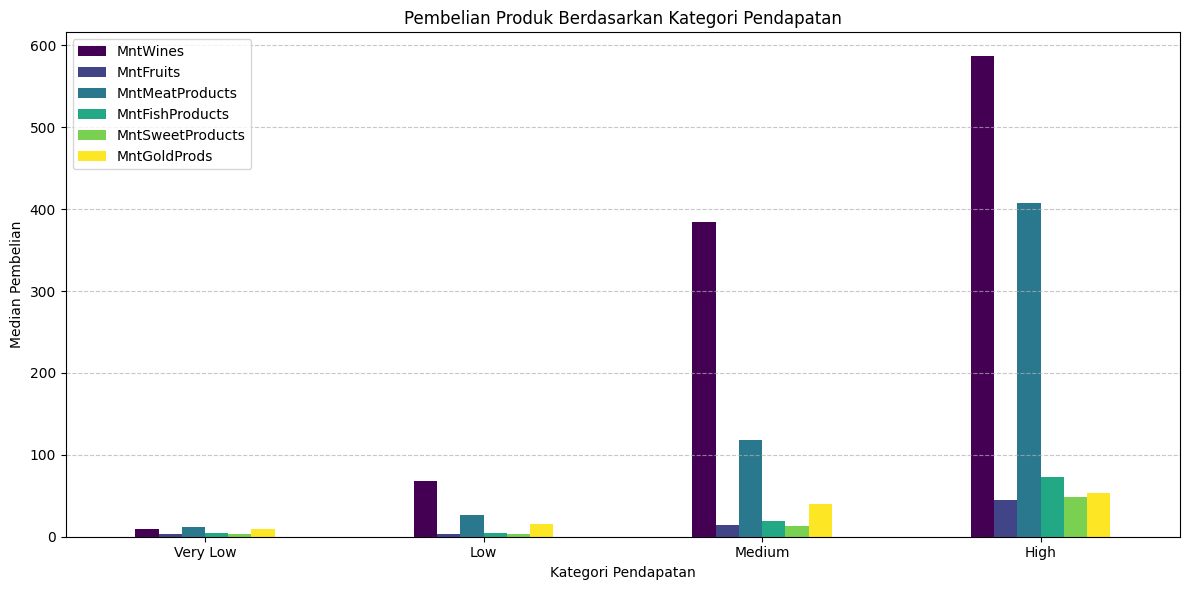

In [59]:
df['IncomeCategory'] = pd.qcut(df['Income'], q=4, labels=["Very Low", "Low", "Medium", "High"])

df_grouped = df.groupby('IncomeCategory')[product_columns].median()

fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=False, colormap='viridis', ax=ax)

ax.set_title('Pembelian Produk Berdasarkan Kategori Pendapatan')
ax.set_ylabel('Median Pembelian')
ax.set_xlabel('Kategori Pendapatan')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Insight**

1. Kenaikan pendapatan searah dengan kenaikan pengeluaran untuk semua jenis kategori produk
2. Produk Wines Meat melonjak tajam seiring naiknya pendapatan.
3. Pada kategori Very Low dan Low median pengeluaran sangat kecil, bahkan untuk kebutuhan esensial seperti meat, fish, dan fruit.

**Analisis**

1. Pendapatan dan pengeluaran berkorelasi positif. Semakin tinggi pendapatan, semakin besar kemampuan mereka dalam membeli beragam jenis produk, termasuk produk non-esensial. Hal ini menunjukkan bahwa strategi penjualan produk harus memperhatikan segmentasi berdasarkan pendapatan pelanggan.

2. Produk Wines dan Meat dikategorikan sebagai barang mewah. Peningkatan tajam dalam pengeluaran pada produk ini mengindikasikan bahwa konsumen dari kategori pendapatan menengah ke atas lebih menghargai kualitas hidup dan pengalaman konsumsi premium. Ini membuka peluang untuk pemasaran produk premium di segmen ini.

3. Keterbatasan daya beli di segmen pendapatan rendah (Very Low dan Low), bahkan untuk produk kebutuhan dasar. Rendahnya pengeluaran bukan karena kurangnya minat terhadap produk, tapi bisa jadi disebabkan keterbatasan ekonomi. Ini penting untuk dipertimbangkan dalam menentukan strategi harga.


**Rekomendasi**

1. Fokuskan produk premium seperti Wines dan Meat untuk segmen berpendapatan tinggi dengan memberikan penawaran eksklusif atau loyalty program. Soroti kualitas premium dari produk dan eksklusivitasnya untuk menarik pembelian dari segmen pendapatan tinggi

2. Buat versi ekonomis atau diskon untuk produk esensial seperti produk ikan dan buah agar tetap terjangkau oleh segmen pendapatan rendah  



**Distribusi Kategori Pendapatan berdasarkan Segmentasi LRFM**

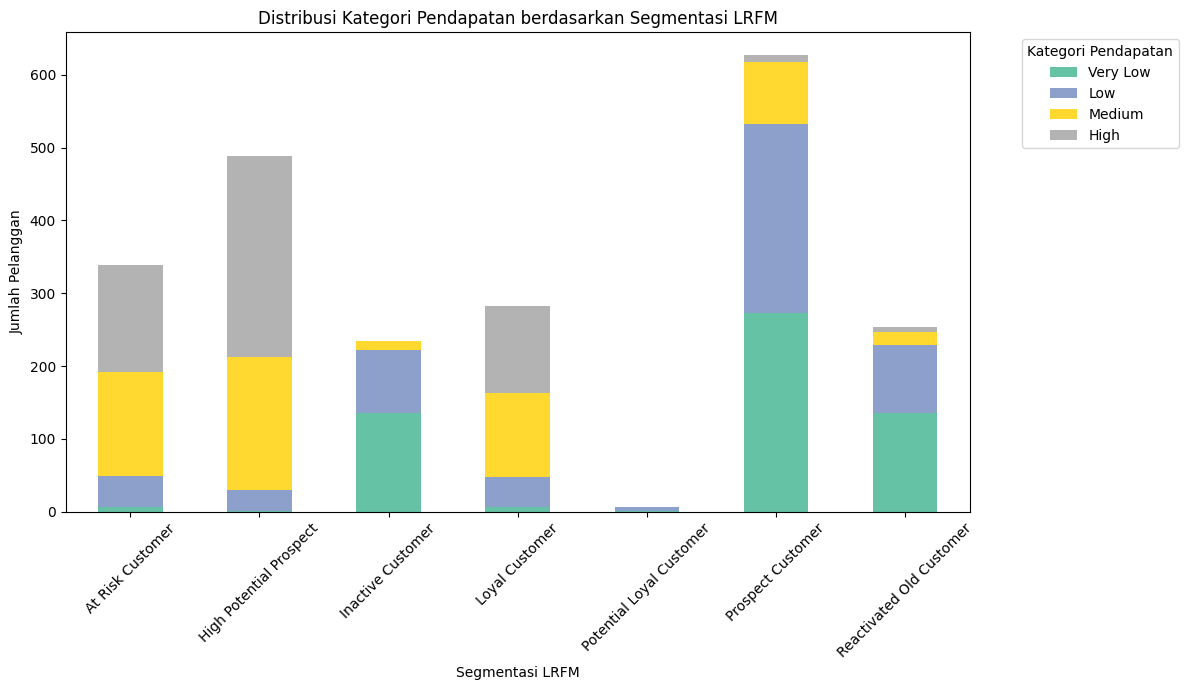

In [60]:
df['IncomeCategory'] = pd.qcut(df['Income'], q=4, labels=["Very Low", "Low", "Medium", "High"])

# Crosstab segmentasi vs kategori income
segment_income_ct = pd.crosstab(df['lrfm_segment_combined'], df['IncomeCategory'])

# Plot
segment_income_ct.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')

plt.title('Distribusi Kategori Pendapatan berdasarkan Segmentasi LRFM')
plt.xlabel('Segmentasi LRFM')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.legend(title='Kategori Pendapatan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Seperti insight dari diagram sebelumnya, peningkatan pendapatan searah dengan peningkatan pengeluaran (monetary), segmen At Risk, High Potential Prospect, dan Loyal customer didominasi oleh orang dengan kategori pendapatan High. Sedangkan segmen lain didominasi oleh orang dengan pendapatan rendah (Low dan very Low). Strategi pemasaran yang dilakukan bisa berdasarkan segmentasi pelanggan yang telah didapat

### Pembelian Produk Berdasarkan Jumlah Anak

<Figure size 1200x600 with 0 Axes>

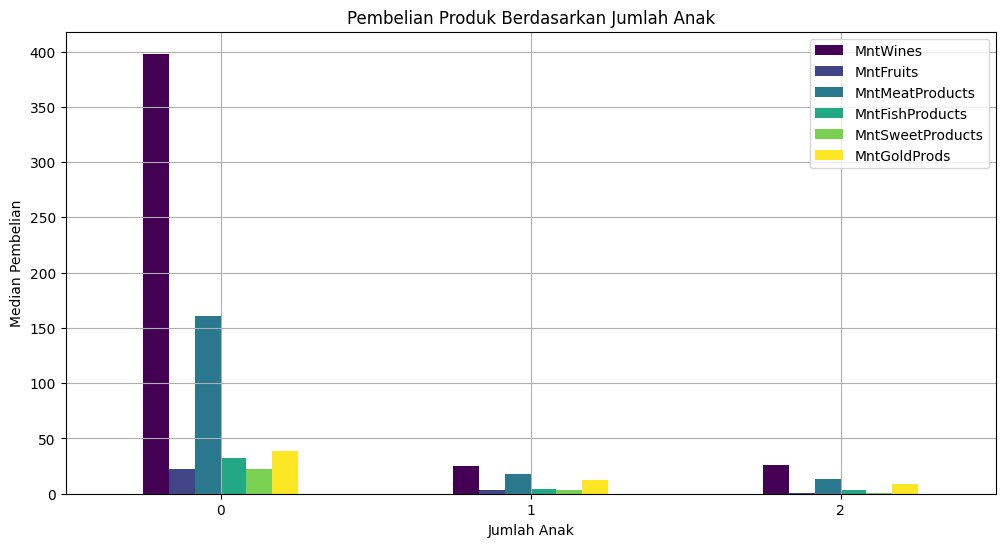

In [61]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('Kidhome')[product_columns].median()
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='viridis')
plt.title('Pembelian Produk Berdasarkan Jumlah Anak')
plt.ylabel('Median Pembelian')
plt.xlabel('Jumlah Anak')
plt.xticks(rotation=360)
plt.grid(True)
plt.show()

**Insight**
1. Pelanggan yang tidak memiliki anak memiliki pembelian jauh lebih tinggi, terutama untuk produk wine, daging, dan emas.
2. Semakin banyak anak semakin rendah total pembelian keseluruhan, terutama untuk produk wine dan meat

**Analisis**
1. Pelanggan tanpa anak cenderung memiliki uang yang lebih banyak untuk dialokasikan ke dalam bentuk barang non-esensial seperti wine dan emas karena mereka tidak memiliki tanggungan biaya untuk anak
2. Semakin banyak jumlah anak, semakin besar alokasi pengeluaran keluarga ke kebutuhan pokok, dan bukan ke produk non-esensial. Pembelian produk protein daging sapi juga bisa jadi diganti menjadi produk lain yang lebih murah seperti daging ayam atau tempe

**Rekomendasi**

1. Fokuskan promosi produk premium seperti wine, daging kualitas tinggi, dan produk emas kepada pelanggan tanpa anak, karena mereka memiliki kecenderungan pengeluaran lebih tinggi untuk produk-produk ini.

2. Buat bundling produk esensial dengan harga lebih ekonomis yang cocok untuk keluarga besar, misalnya: paket ikan dan buah. Gunakan juga pendekatan storytelling seperti: “Belanja hemat untuk keluarga cerdas"



### Pembelian Produk Berdasarkan Jumlah Remaja

<Figure size 1200x600 with 0 Axes>

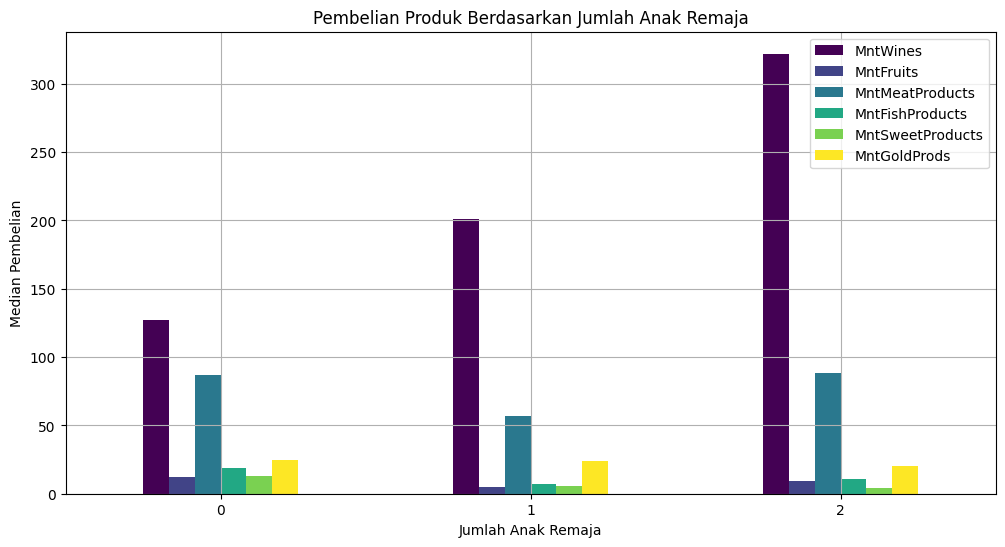

In [62]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('Teenhome')[product_columns].median()
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='viridis')
plt.title('Pembelian Produk Berdasarkan Jumlah Anak Remaja')
plt.ylabel('Median Pembelian')
plt.xlabel('Jumlah Anak Remaja')
plt.xticks(rotation=360)
plt.grid(True)
plt.show()

**Insight**
- Pengeluaran untuk produk wine meningkat seiring bertambahnya jumlah anak remaja

- Pengeluaran produk fish, sweet, dan fruit cenderung turun saat memiliki anak remaja

**Analisis**
1. Berbeda dengan pola jumlah anak secara umum, kehadiran anak remaja tidak menurunkan pembelian terhadap produk wine, malah terlihat korelasi positif terhadap pembelian wine dan pertambahan jumlah anak remaja. Remaja bisa menjadi pengaruh konsumsi (influencer rumah tangga), mendorong orang tua membeli lebih banyak makanan, wine untuk hiburan keluarga, dll.
2. Keluarga yang memiliki anak remaja cenderung mengalokasikan pengeluaran ke hal pokok yang lebih murah, Anak remaja juga cenderung memiliki preferensi makanan yang berbeda, seperti lebih menyukai makanan cepat saji yang lebih instan

**Rekomendasi**
1. Untuk mempertahankan atau meningkatkan penjualan produk wine, tawarkan paket produk wine & makanan spesial untuk dinikmati bersama keluarga dengan tagline “Family Fine Dining at Home”, tawarkan bundle produk juga untuk menarik daya beli lebih dari pelanggan seperti bundle produk wine dan meat. Buat juga kampanye yang membawa nama keluarga, seperti “Momen Berkualitas Bersama Keluarga”
2. Buat bundle untuk produk dengan penjualan rendah, seperti bundle fish + fruits + sweet products

### Total Pengeluaran per Jenis Produk berdasarkan Segmentasi LRFM

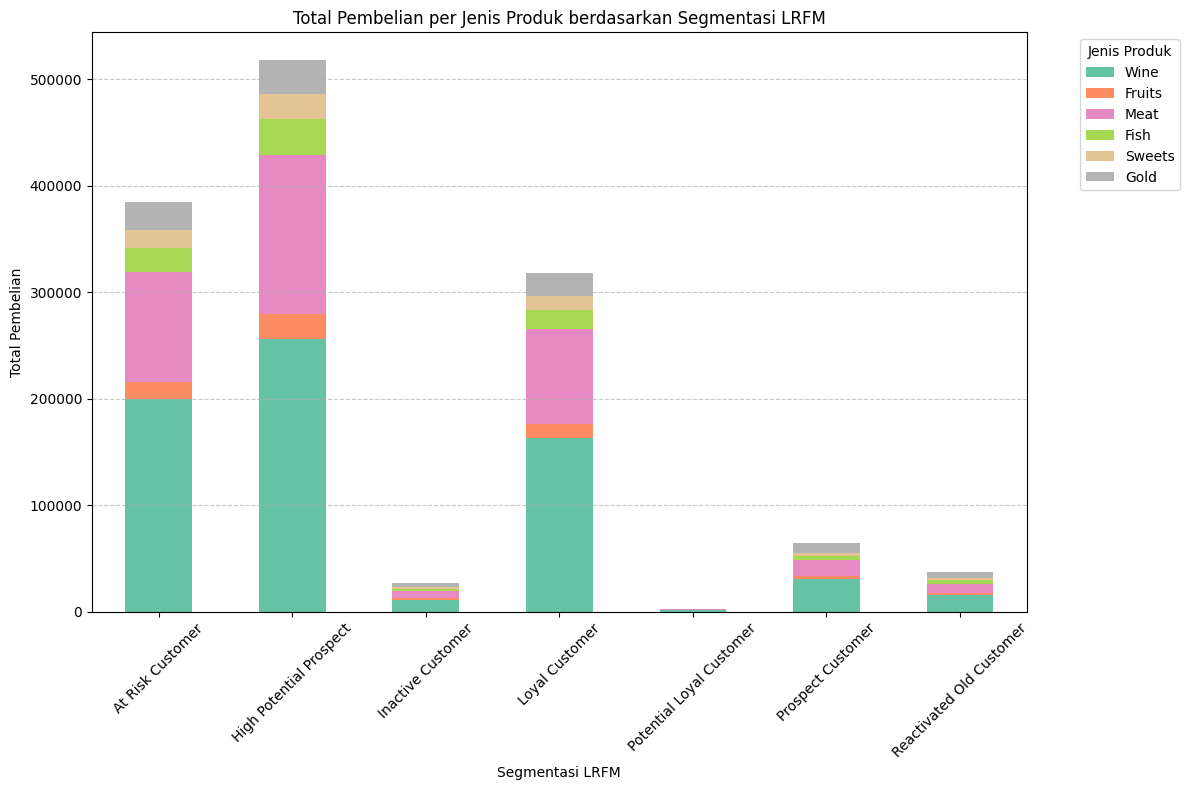

In [63]:
produk_per_segment = df.groupby('lrfm_segment_combined')[[
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]].sum()

produk_per_segment.columns = ['Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

produk_per_segment.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')

plt.title('Total Pembelian per Jenis Produk berdasarkan Segmentasi LRFM')
plt.xlabel('Segmentasi LRFM')
plt.ylabel('Total Pembelian')
plt.xticks(rotation=45)
plt.legend(title='Jenis Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight & Analisis**
1. Segmen High Potential Prospect merupakan segmen yang paling banyak melakukan pembelian untuk semua jenis produk meskipun belum loyal, segmen ini memiliki daya beli tinggi dan potensi besar untuk menjadi Loyal Customer.
2. Segmen Inactive Customer dan Potential Loyal Customer memiliki pembelian yang sangat rendah. Hal ini mengindikasikan perlu strategi untuk menarik daya beli pada segmen ini.
3. Segmen Loyal Customer dan At Risk Customer juga menyumbang pembelian besar
di semua kategori produk
4. Produk Sweets, Fish, dan Fruits memiliki pembelian kecil di semua segmen, mengindikasikan daya tarik atau kebutuhan konsumen terhadap produk ini cenderung rendah.

**Rekomendasi**

1. Optimalkan Segmen High Potential Prospect dengan mengirimkan penawaran eksklusif. Selain itu, karena memiliki daya beli yang tinggi, dorong pembelian produk tambahan melalui email marketing atau cart suggestion.

2. Aktifkan Kembali Inactive & Potential Loyal Customer dengan memberikan kupon diskon agar mereka kembali berbelanja

3. Pertahankan Loyal customer dengan memberikan apresiasi seperti voucher diskon tambahan dan extra cashback. Kirim reminder atau rekomendasi produk kepada at risk customer agar mereka kembali berbelanja.

4. Buat bundle promo produk Sweets, Fish, dan Fruits dengan produk Meat yang memiliki daya beli lebih tinggi


### **Kesimpulan dan Rekomendasi**

#### **Kesimpulan**
1. Produk Wine dan Meat merupakan produk dengan penjualan tertinggi, terutama dikonsumsi oleh segmen dengan penghasilan tinggi, status pernikahan "Widow", tanpa anak, atau memiliki anak remaja.

2. Status pernikahan dan jumlah anak sangat memengaruhi perilaku konsumsi. Konsumen "Widow" dan tanpa anak cenderung membeli produk non-esensial seperti wine dan emas, sedangkan keluarga dengan banyak anak lebih fokus ke kebutuhan pokok.

3. Pendapatan berkorelasi positif dengan pengeluaran, dengan segmen berpendapatan tinggi lebih banyak membeli produk premium, sementara segmen rendah cenderung menahan pengeluaran bahkan untuk kebutuhan dasar.

4. Segmentasi pelanggan menunjukkan bahwa segmen High Potential Prospect dan Loyal Customer merupakan kontributor utama pembelian. Sementara itu, segmen Inactive dan Potential Loyal Customer membutuhkan pendekatan khusus untuk diaktifkan kembali.

5. Produk seperti Fruits, Fish, dan Sweets memiliki daya tarik rendah di semua segmen, namun masih berpotensi ditingkatkan dengan strategi bundling.

#### **Rekomendasi**

1. Untuk mempertahankan dan meningkatkan produk Wine dan Meat dengan total monetary yang sudah cukup tinggi dengan memfokuskan promosi ke segmen widow, tanpa anak, dan berpendapatan tinggi. Tawarkan bundling premium produk wine dan daging serta berikan loyalty program eksklusif.

2. Untuk meningkatkan monetary produk esensial seperti fish, fruits, dan sweets yang memiliki total monetary yang masih rendah buat bundling hemat dengan produk daging yang memiliki monetary pembelian yang tinggi

3. Konsumen dengan pendapatan tinggi dapat diberi penawaran eksklusif secara rutin, terutama untuk produk wine dan meat. Sedangkan untuk konsumen dengan pendapatan rendah dapat disediakan promo bundle hemat dari produk esensial serta menyediakan versi ekonomis produk.

4. Rekomendasi berdasarkan segmen LRFM:  
   - High Potential Prospect: Upsell dengan promo khusus.  
   - Inactive/Potential Loyal: Aktifkan dengan diskon.  
   - Loyal/At Risk: Pertahankan dengan cashback & reminder produk.

5. Untuk pelanggan yang tidak memiliki anak dapat dilakukan promosikan produk non-esensial seperti wine, karena segmen ini memiliki daya beli tinggi terhadap produk ini. Sedangkan untuk pelanggan yang memiliki banyak anak dapat difokuskan untuk menawarkan bundling produk esensial untuk keluarga, karena daya beli segmen ini terhadap produk wine sudah tidak sebesar segmen yang tidak memiliki anak. Sementara itu untuk pelanggan yang memiliki anak remaja dapat diawarkan paket bundle keluarga (Wine + Meat).  

#### **Analisis Rumusan Masalah**
Berdasarkan grafik dan analisis yang telah dilakukan untuk mengetahui monetary dan penjualan produk berdasarkan karakteristik konsumen, kita dapat menjawab rumusan masalah berikut:
Bagaimana pola pembelian produk berdasarkan karakteristik pelanggan?

1. **Apakah pelanggan dengan status pernikahan tertentu cenderung membeli jenis produk tertentu?**
Ya. Pelanggan dengan status Widow memiliki pengeluaran tertinggi, terutama pada produk Wine. Sementara itu, pelanggan Single cenderung memiliki pengeluaran terendah di hampir semua kategori. Produk Gold juga banyak dibeli oleh pelanggan Divorced, Single, dan Widow yang umumnya memiliki kontrol finansial pribadi lebih besar.

2. **Bagaimana kategori pendapatan memengaruhi pembelian terhadap berbagai jenis produk?**
Terdapat korelasi positif antara pendapatan dan pengeluaran. Pelanggan dengan pendapatan tinggi lebih banyak membeli produk premium seperti Wine dan Meat, sedangkan segmen berpendapatan rendah memiliki pengeluaran minim bahkan untuk produk esensial seperti Fish dan Fruit, menunjukkan keterbatasan daya beli.

3. **Apakah jumlah anak dan remaja dalam keluarga berkorelasi dengan pilihan produk?**
Ya. Pelanggan tanpa anak cenderung membeli produk non-esensial lebih banyak (Wine, Meat, Gold). Semakin banyak anak, terutama anak kecil, pengeluaran beralih ke kebutuhan pokok. Namun, kehadiran anak remaja justru menunjukkan peningkatan pembelian Wine, yang bisa dikaitkan dengan kebiasaan konsumsi dalam aktivitas keluarga.

4. **Produk apa saja yang paling banyak dibeli oleh pelanggan berdasarkan segmentasi LRFM?**
Segmen High Potential Prospect adalah yang paling aktif membeli hampir semua produk, meski belum menjadi pelanggan loyal. Segmen Loyal Customer dan At Risk Customer juga menyumbang pembelian tinggi. Produk Wine dan Meat adalah yang paling banyak dibeli, sedangkan Fish, Fruit, dan Sweets cenderung rendah di seluruh segmen.



# **Berdasarkan Tempat Pembelian**

### Total Pembelian Berdasarkan Tempat

<ipython-input-64-f98744289140>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=methods_counts.index, y=methods_counts.values, palette='cubehelix')


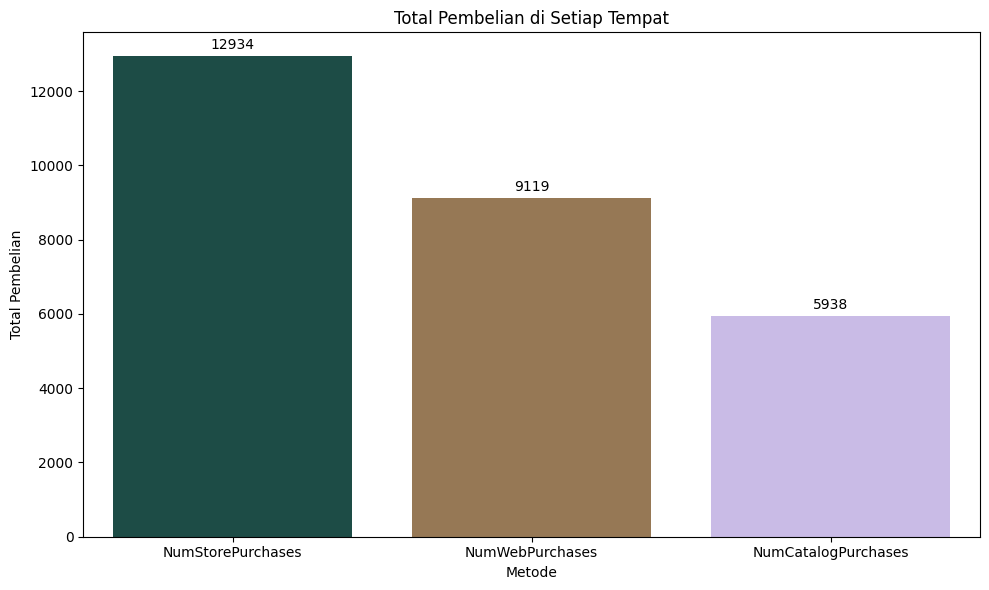

In [64]:
methods = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']

methods_counts = df[methods].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=methods_counts.index, y=methods_counts.values, palette='cubehelix')

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', padding=3)

plt.title('Total Pembelian di Setiap Tempat')
plt.ylabel('Total Pembelian')
plt.xlabel('Metode')
plt.tight_layout()
plt.show()


**Insight & Analisis**

1. Pembelian secara langsung di toko merupakan metode yang paling sering digunakan oleh consumer Ini menunjukkan bahwa consumer menyukai pengalaman belanja langsung atau merasa lebih nyaman melihat produk secara langsung.
2. Pembelian melalui Website berada di urutan kedua. Hal ini memperlihatkan pergeseran pembelanjaan ke arah digital, meskipun belum melampaui pembelian di toko.
3. Katalog menduduki peringkat terbawah metode yang digunakan Kemungkinan karena metode ini tidak sepopuler atau kurang nyaman digunakan dibanding metode lainnya.

**Rekomendasi**
1. Optimalkan Toko Fisik (Offline) dengan memperkuat pelayanan consumer di toko seperti pelatihan staf dengan baik, tata letak produk yang menarik dan mudah dicari, dan menerapkan program loyalitas.
2. Karena pembelian melalui website juga tinggi, maka perlu ditingkatkan juga pengalaman belanja online dengan membuat uiux yang mudah digunakan seperti mempercepat proses checkout, menyediakan banyak opsi pembayaran, dan optimalkan tampilan website.
3. Membatasi penggunaan katalog dan mengarahkan penggunanya untuk berbelanja lewat web



### Tempat Pembelian Produk Berdasarkan Status Pernikahan

<Figure size 1200x600 with 0 Axes>

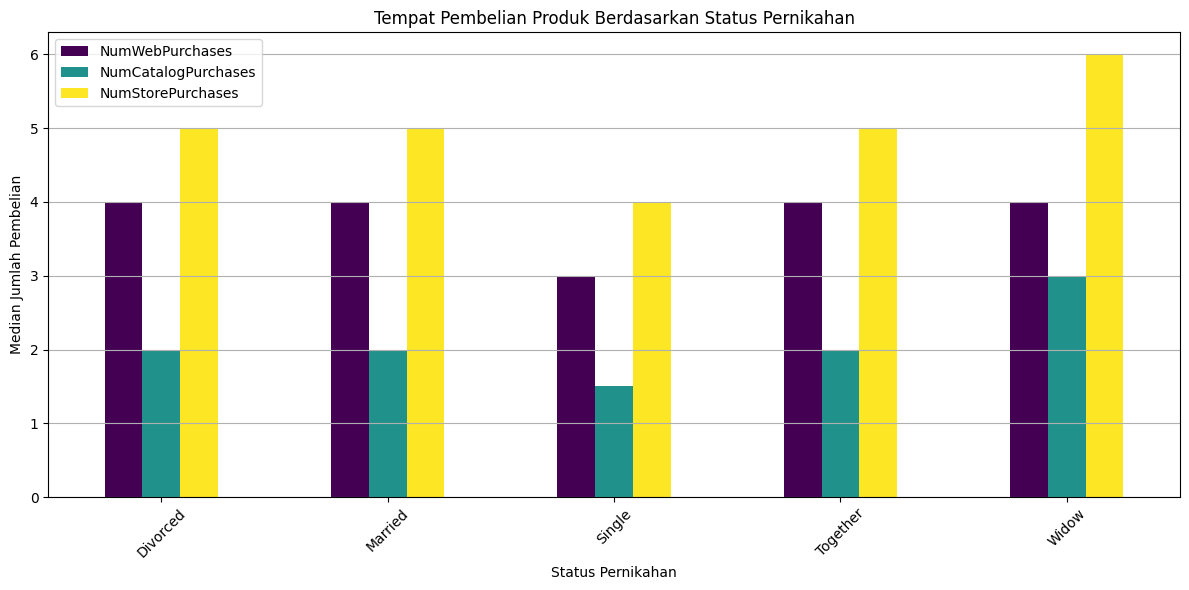

In [65]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('Marital_Status')[place_columns].median()
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='viridis')
plt.title('Tempat Pembelian Produk Berdasarkan Status Pernikahan')
plt.ylabel('Median Jumlah Pembelian')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Insight**

1. Store (Offline) adalah tempat pembelian paling dominan di semua status pernikahan.
2. Status Widow memiliki jumlah median pembelian di Store tertinggi (6), melebihi semua status lainnya.
3. Pembelian melalui Katalog merupakan metode dengan pembelian terendah dibandingkan metode lainnya.
4. Status Single memiliki jumlah median pembelian paling rendah untuk semua metode pembelian dibandingkan status lainnya.

**Analisis**
1. Toko fisik (offline store) tetap menjadi tempat pembelian utama, mengindikasikan pelanggan masih menyukai pengalaman berbelanja langsung atau kenyamanan berbelanja offline, pelanggan ingin melihat langsung produk yang ingin dibeli atau merasa lebih nyaman dengan interaksi fisik.
2. Segmen Widow dengan usia yang lebih tua dibandingkan segmen lainnya mungkin kurang familiar dengan dengan teknologi e-commerce (web), sehingga lebih sering belanja secara offline
3. Pembelian melalui katalog merupakan metode dengan median pembelian paling rendah di semua segmen. Hal ini menunjukkan bahwa pembelian melalui katalog sudah kurang relevan, mungkin karena dianggap tidak praktis atau tidak menarik secara visual dibandingkan dengan web store dan toko fisik.
4. Pelanggan dengan status Single memiliki tingkat median pembelian paling rendah di seluruh metode pembelian. Hal ini bisa disebabkan oleh daya beli yang lebih rendah, gaya hidup lebih hemat, atau prioritas pengeluaran yang berbeda dibanding kelompok lain.

**Rekomendasi**
1. Karena toko fisik masih menjadi tempat pembelian dominan di semua konsumen, maka perkuat toko fisik dengan memberikan pengalaman belanja yang nyaman serta berikan promosi offline seperti diskon langsung, program loyalitas, atau event store-based untuk meningkatkan engagement dan penjualan.

2. Tingkatkan UI/UX web yang mudah digunakan untuk segala kalangan usia seperti mempercepat proses checkout dan mencari barang. Berikan promosi khusus untuk pembelian online untuk meningkarkan minat beli konsumen secara online. Sementara itu, karena minat beli melalui katalog rendah, integrasikan katalog ke dalam aplikasi/web (katalog digital). Bisa juga dengan mempersempit penggunakan katalog untuk segmen yang sesuai seperti Widow.

3. Lakukan pendekatan khusus seperti kampanye digital yang sesuai dengan gaya hidup mereka, misalnya promosi hemat atau paket bundling yang terjangkau. Targetkan juga waktu promosi yang relevan, seperti saat menjelang akhir bulan atau payday.




### Tempat Pembelian Produk Berdasarkan Kategori Pendapatan

<ipython-input-66-48c130ddbb28>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('IncomeCategory')[place_columns].median()


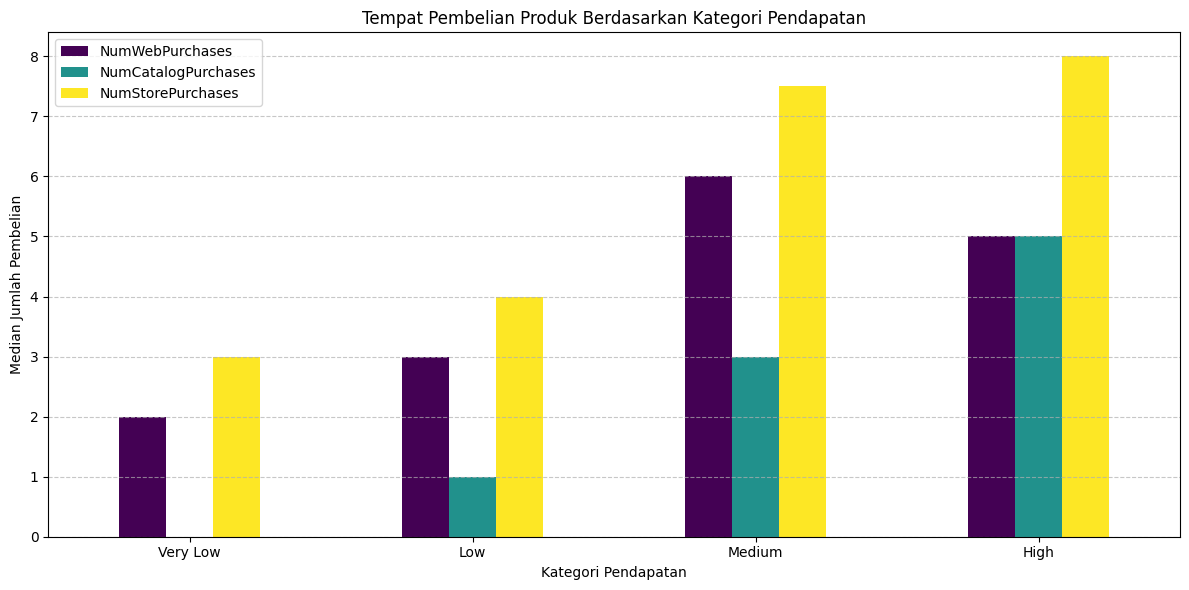

In [66]:
df['IncomeCategory'] = pd.qcut(df['Income'], q=4, labels=["Very Low", "Low", "Medium", "High"])

df_grouped = df.groupby('IncomeCategory')[place_columns].median()

fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', stacked=False, colormap='viridis', ax=ax)

ax.set_title('Tempat Pembelian Produk Berdasarkan Kategori Pendapatan')
ax.set_ylabel('Median Jumlah Pembelian')
ax.set_xlabel('Kategori Pendapatan')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Insight**

1. Jumlah pembelian secara umum meningkat seiring naiknya pendapatan di berbagai tempat/metode penjualan  
2. Toko fisik menjadi metode yang paling sering digunakan di semua kategori pendapatan
3. Kategori pendapatan "high" cenderung lebih merata menggunakan ketiga metode pembelian
4. Kategori pendapatan Very Low tidak ada yang menggunakan metode pembelian melalui katalog

**Analisis**

1. Di semua kategori pendapatan, toko fisik merupakan metode yang paling sering digunakan, hal ini menunjukkan bahwa pelanggan lebih menyukai interaksi dan memilih produk secara fisik. Keterbatasan akses digital bisa jadi menjadi faktor pelanggan lebih memilih berbelanja secara langsung.

2. Pada kategori High, pembelian melalui web, katalog, dan toko fisik lebih seimbang. Ini menandakan tingginya literasi digital, fleksibilitas, serta kenyamanan dalam memilih berbagai metode pembelian pada segmen pendapatan ini.

3. Tidak adanya pembelian melalui katalog pada kelompok pendapatan Very Low menunjukkan keterbatasan akses terhadap media promosi ini atau katalog kurang relevan bagi segmen pendapatan ini.

**Rekomendasi**

1. Sesuaikan strategi pemasaran untuk berbagai segmen, untuk kategori medium dan high, optimalkan pengalaman berbelanja pada web, katalog, dan toko fisik. Sedangkan untuk kategori low dan very low, optimalkan pengalaman berbelanja melalui toko fisik dan website saja.

2. Berikan promo untuk pembelian pertama melalui katalog untuk meningkatkan pengalaman awal, terutama pada segmen pendapatan rendah.

### **Kesimpulan dan Rekomendasi**
#### **Kesimpulan**
1. Toko fisik merupakan metode pembelian dominan di semua segmen konsumen, baik dari sisi status pernikahan maupun pendapatan, menandakan preferensi kuat terhadap pengalaman berbelanja langsung.
2. Website mulai menunjukkan tren positif sebagai pilihan tempat untuk berbelanja, terutama di segmen pendapatan tinggi
3. Katalog menjadi metode pembelian dengan performa terendah dan hampir tidak digunakan oleh segmen berpendapatan rendah
4. Segmen Widow dan pendapatan High menunjukkan kecenderungan pembelian yang tinggi dan seimbang di berbagai saluran, sementara segmen Single dan pendapatan Very Low merupakan segmen dengan total pembelian paling kecil dalam semua metode pembelian.

#### **Rekomendasi**
1. Tingkatkan pengalaman berbelanja secara langsung di toko fisik dengan memberikan layanan staf yang baik, layout toko menarik, serta program loyalitas dan promosi langsung.

2. Tingkatkan kualitas website dengan memperbaiki UI/UX website dengan tujuan mempermudah proses checkout, sediakan opsi pembayaran beragam, dan tawarkan promosi khusus online agar menarik bagi semua kalangan usia.

3. Evaluasi lebih lanjut penggunaan katalog, minimalkan penggunaan katalog fisik dan menggantinya ke bentuk digital, serta targetkan hanya pada segmen yang sesuai seperti konsumen lebih tua (Widow).

#### **Analisis Rumusan Masalah**
1. **Apakah pelanggan lebih banyak melakukan pembelian secara online, katalog, atau toko fisik?**
Pelanggan lebih banyak melakukan pembelian di toko fisik (offline). Ini menunjukkan bahwa mayoritas konsumen masih menyukai pengalaman berbelanja langsung, melihat produk secara fisik, dan berinteraksi langsung di toko. Metode pembelian online (website) berada di posisi kedua, menunjukkan minat pelanggan untuk berbelanja secara digital meskipun belum mengalahkan minat berbelanja secara langsung. Sementara itu, katalog adalah metode pembelian dengan jumlah paling rendah, menandakan bahwa metode ini sudah tidak terlalu relevan atau diminati oleh pelanggan.

2. **Bagaimana status pernikahan dan pendapatan memengaruhi preferensi tempat pembelian?**
  - **Status Pernikahan:**
Semua pelanggan dengan status pernikahan apapun menunjukkan preferensi berbelanja yang sama di semua tempat. Pelanggan tetap memilih untuk berbelanja secara langsung diikuti oleh pembelanjaan meelalui website di posisi ke-dua
  - **Pendapatan:**
Semua kategori pendapatan menunjukkan preferensi tertinggi pada toko fisik. Konsumen dengan pendapatan High cenderung seimbang menggunakan ketiga metode pembelian, sedangkan konsumen dengan pendapatan Very Low tidak melakukan pembelian melalui katalog, kemungkinan karena akses terbatas atau kurang relevan bagi mereka.

#**Berdasarkan Promosi**

### Jumlah Pelanggan yang Menerima Tawaran di Setiap Kampanye

<ipython-input-67-c8d5d8c732bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=campaign_counts.index, y=campaign_counts.values, palette='cubehelix')


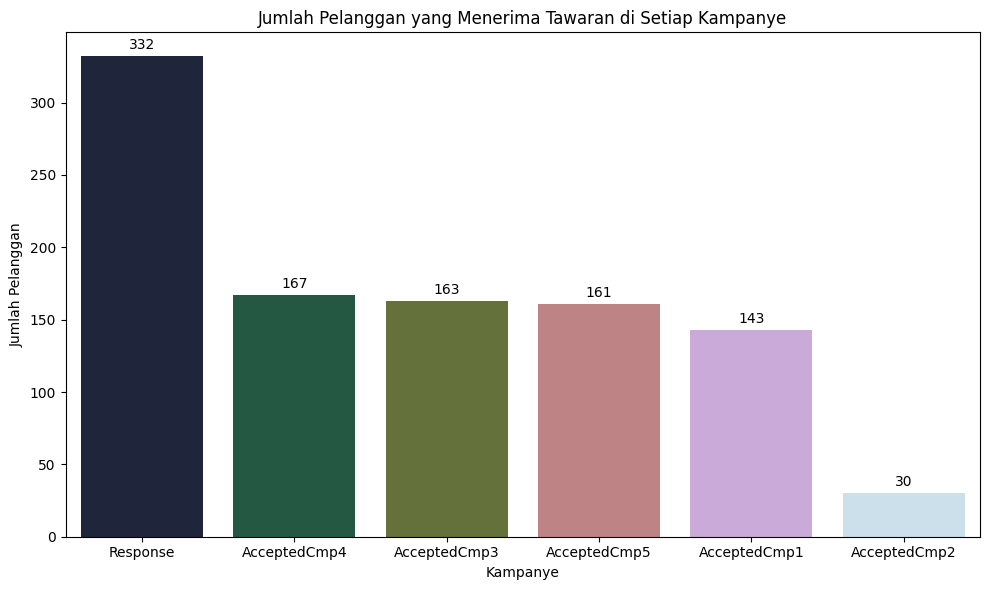

In [67]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

campaign_counts = df[campaigns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=campaign_counts.index, y=campaign_counts.values, palette='cubehelix')

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', padding=3)

plt.title('Jumlah Pelanggan yang Menerima Tawaran di Setiap Kampanye')
plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Kampanye')
plt.tight_layout()
plt.show()


**Insight**
1. Kampanye dengan jumlah penerimaan tawaran tertinggi adalah kampanye terakhir (Response).
2. Kampanye 2 (AcceptedCmp2) memiliki jumlah penerimaan terendah, hanya 30 pelanggan.

**Analisis**
1. Kampanye terakhir (Response) tampaknya menggunakan strategi yang lebih menarik atau dilakukan pada waktu yang tepat sehingga menghasilkan jumlah penerimaan tertinggi. Perlu dievaluasi lebih lanjut bagaimana cara kerja kampanye ini untuk melakukan kampanye selanjutnya agar lebih efektif

2. Rendahnya penerimaan pada kampanye Cmp2 menunjukkan bahwa strategi atau waktu pada kampanye ini kurang sesuai dengan preferensi pelanggan.

**Rekomendasi**
1. Analisis lebih dalam bagaimana cara kerja kampanye terakhir ( konten, waktu pelaksanaan, dan media yang digunakan), kampanye Cmp4, Cmp3, dan Cmp5 untuk pengoptimalan efektivitas kampanye di kampanye selanjutnya.

### Total Pembelian Berdasarkan Jumlah Kampanye yang Diterima

<ipython-input-68-a21273f0730e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TotalAcceptedCampaigns', y='TotalSpending', data=df, palette='coolwarm')


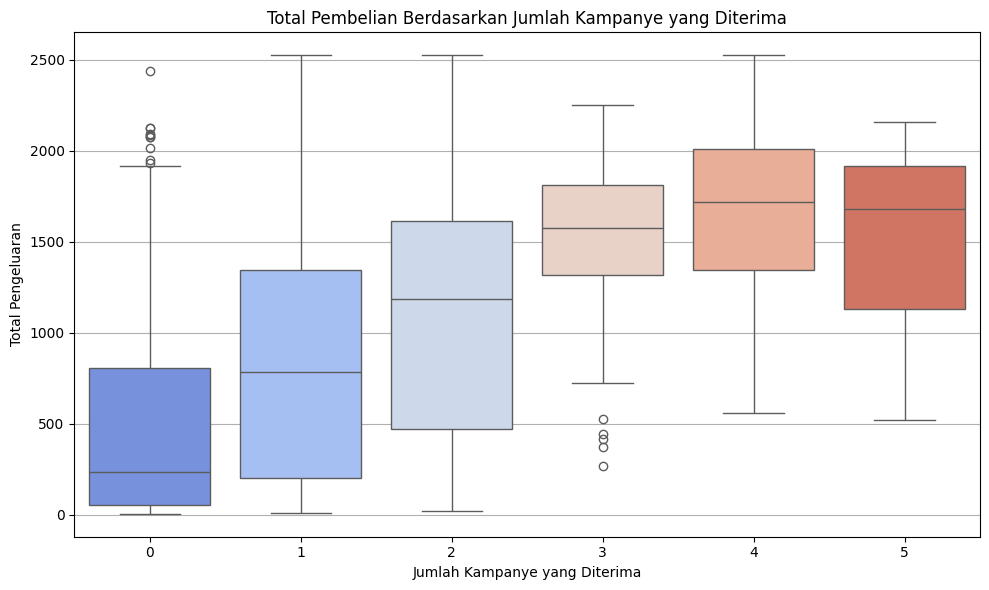

In [68]:
Acccampaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']

#total kampanye yang diterima per pelanggan
df['TotalAcceptedCampaigns'] = df[Acccampaigns].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalAcceptedCampaigns', y='TotalSpending', data=df, palette='coolwarm')

plt.title('Total Pembelian Berdasarkan Jumlah Kampanye yang Diterima')
plt.xlabel('Jumlah Kampanye yang Diterima')
plt.ylabel('Total Pengeluaran')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [69]:
df[['TotalSpending', 'TotalAcceptedCampaigns']].corr()

,TotalSpending,TotalAcceptedCampaigns
TotalSpending,1.000000,0.455892
TotalAcceptedCampaigns,0.455892,1.000000


**Insight**
1. Semakin banyak kampanye yang diterima, semakin tinggi total pengeluaran pelanggan (variabel berkorelasi positif).
2. Terjadi kenaikan signifikan pada median pembelian saat pelanggan belum menerima kampanye dan saat telah menerima kampanye (0 ke 1)


**Analisis**
1. Terjadi peningkatan pembelian saat pelanggan menerima kampanye lebih banyak, kampanye berperan penting dalam mendorong konsumen untuk belanja lebih banyak.

**Rekomendasi**

1. Lakukan kampanye secara rutin untuk meningkatkan total pembelian


### Jumlah Pelanggan yang Menerima Kampanye per Segmentasi LRFM

<Figure size 1200x800 with 0 Axes>

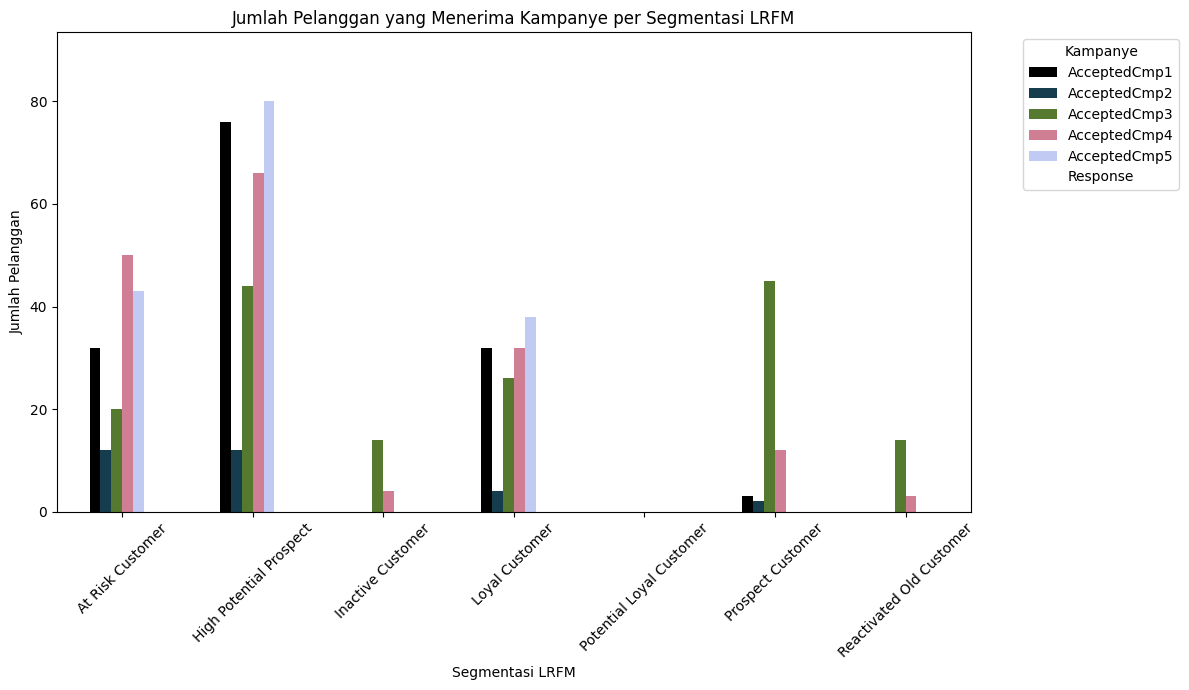

In [70]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

campaign_counts_by_segment = df.groupby('lrfm_segment_combined')[campaigns].sum()

plt.figure(figsize=(12, 8))
campaign_counts_by_segment.plot(kind='bar', stacked=False, colormap='cubehelix', figsize=(12, 7))

plt.title('Jumlah Pelanggan yang Menerima Kampanye per Segmentasi LRFM')
plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Segmentasi LRFM')
plt.xticks(rotation=45)
plt.legend(title='Kampanye', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Insight**
1. High Potential Prospect memiliki jumlah penerima kampanye tertinggi untuk semua jenis kampanye. Pada segmen ini kampanye ke 1, 4, dan 5 efektif menarik daya beli konsumen
2. At Risk Customer juga menunjukkan penerimaan kampanye yang cukup tinggi, terutama untuk kampanye ke-4 dan ke-5.
3. Loyal Customer juga cukup responsif terhadap kampanye, meskipun sedikit lebih rendah dibandingkan High Potential Prospect. Pada segmen ini kampanye ke 5 efektif menarik daya beli konsumen
4. Inactive Customer, Prospect Customer, dan Reactivated Old Customer menunjukkan respons yang rendah untuk penerimaan jenis kampanye.
5. Potential Loyal Customer sepertinya tidak menerima kampanye sama sekali
6. Kampanye ke-3 cenderung efektif untuk menjangkau semua segmen

**Rekomendasi**
1. Tingkatkan kampanye untuk semua segmen, high potential prospect customer yang memiliki monetary paling tinggi juga menerima penawaran kampanye paling tinggi juga, sehingga bisa jadi penawaran kampanye berpengaruh terhadap besar nilai monetary di setiap segmen pelanggan
2. Uji coba metode kampanye yang berbeda pada setiap segmen dan lihat metode mana yang efektif pada segmen tersebut
3. Lakukan metode yang sama seperti kampanye 3 jika bertujuan untuk menargetkan pembelian dari semua segmen

### **Kesimpulan dan Rekomendasi**


#### **Kesimpulan**
1. Kampanye terakhir (Response) berhasil mencapai jumlah penerimaan tertinggi, menunjukkan strategi, waktu pelaksanaan, atau media yang digunakan sangat efektif.
2. Kampanye ke-2 (Cmp2) adalah kampanye dengan penerimaan terendah, menandakan strategi atau timing yang kurang sesuai dengan preferensi pelanggan.
3. Terdapat korelasi positif antara jumlah kampanye yang diterima dengan total pembelian, artinya semakin banyak kampanye diterima pelanggan, semakin besar monetary-nya.
4. High Potential Prospect adalah segmen paling responsif terhadap kampanye di semua jenis kampanye, terutama kampanye ke-1, 4, dan 5. Segmen Loyal Customer dan At Risk Customer juga cukup responsif, sedangkan Inactive Customer, Prospect Customer, dan Reactivated Old Customer menunjukkan respons rendah.

#### **Rekomendasi**
1. Pelajari strategi kampanye terakhir (Response) berupa konten, media promosi, serta waktu pelaksanaan sebagai acuan untuk kampanye mendatang.
2. Tingkatkan frekuensi kampanye secara konsisten karena terbukti berdampak positif terhadap total pembelian pelanggan.
3. Tinjau kembali Kampanye ke-2 untuk mengidentifikasi faktor kegagalan dan hindari pendekatan serupa di masa depan.

#### **Analisis Rumusan Masalah**
1. **Apakah pelanggan yang sering menerima kampanye memengaruhi total pembeliannya?**
Ya, terdapat korelasi positif antara jumlah kampanye yang diterima dengan total pembelian pelanggan. Hal ini terlihat dari peningkatan signifikan pada median pembelian ketika pelanggan mulai menerima kampanye (dari 0 ke 1 kampanye diterima). Artinya, kampanye yang diterima berkontribusi dalam mendorong pelanggan untuk melakukan pembelian lebih banyak, sehingga semakin sering pelanggan menerima kampanye, maka cenderung semakin tinggi total pengeluarannya.

2. **Promosi mana yang paling efektif dalam mengurangi risiko churn, terutama pada segmen pelanggan dengan nilai monetary atau frequency yang rendah?**
Kampanye ke-3 menjadi promosi yang paling efektif dalam menjangkau hampir semua segmen, termasuk segmen dengan risiko churn tinggi seperti Inactive Customer, Prospect Customer, dan Reactivated Old Customer. Walaupun respons dari segmen ini masih tergolong rendah, kampanye ke-3 mampu menjangkau segmen ini lebih baik dibanding kampanye lain
